# Project Challenge: Exploratory and predictive analytics upon the station-based bike sharing Citi Bike (NYC, 2018)

#### **_by Enrico Leonardi (s222721), Clara Sorre (s232764), Yunxuan Li (s232900)_**
---
#### _Final Hand-in: Project Report_
---
## Table of Contents
- [Section 1: <u>Introduction + Data analysis and visualization</u>](#intro)
 - [Part 1.1: <u>Introduction</u>](#intro1)
 - [Part 1.2: <u>Data Preparation</u>](#dataprep1)
 - [Part 1.3: <u>Load and present basic information of the dataset</u>](#basicinfo1)
 - [Part 1.4: <u>Data Cleaning and Data Analysis</u>](#cleaning1)
 - [Part 1.5: <u>Insightful Exploration</u>](#explo1)
- [Section 2: <u>Exploratory Component</u>](#exploratory)
 - [Part 2.1: <u>Plot the 10 most frequent and the 10 least frequent paths.</u>](#plot2)
 - [Part 2.2: <u>Principal Component Analysis</u>](#pca2)
- [Section 3: <u>Prediction Challenge</u>](#prediction)
 - [Part 3.1: <u>Clustering</u>](#cluster3)
 - [Part 3.2: <u>Modeling for Predicting</u>](#modeling3)
 - [Part 3.3: <u>Calculations applied to bicycles</u>](#calcul3)
- [Section 4: <u>Conclusions</u>](#conclusions)

In [1]:
%%html
<a id='intro'></a>
<a id='intro1'></a>

# Section 1: Introduction + Data analysis and visualization

## Part 1.1: Introduction

We will be working with a dataset obtained through **Citi Bike (New York)**, one of the biggest station-based bike sharing systems in the US. The dataset includes more than 900 stations and
14000 bikes, and it contains over **17 million bike rides** observed **during 2018**. Below is the list of the features included in the dataset.

**FEATURES**

* **tripduration** : Duration of the bike trip *(in seconds)*
* **starttime** : Start of the bike trip *(date and time)*
* **stoptime** : Stop of the bike trip *(date and time)*
* **start_station_id** : ID of the departure station of the bike trip *(the ID is in the range [72 to 3721])*
* **start_station_latitude** : Latitude of the departure station of the bike trip
* **start_station_longitude** : Longitude of the departure station of the bike trip
* **end_station_id** : ID of the arrival station of the bike trip *(the ID is in the range [72 to 3721])*
* **end_station_latitude** 	: Latitude of the arrival station of the bike trip
* **end_station_longitude** : Longitude of the arrival station of the bike trip
* **bikeid** : ID of the bike	*(the ID is in the range [14529 to 35831])*
* **usertype** : Type of User *(Subscriber = Annual Member, Customer = 24-hour pass or 3-days pass user)*
* **birth_year** : Year of birth of the user *(the birthdate goes from 1885 to 2002)*
* **gender** : Gender of the user *(0 = Unknown, 1 = Male, 2 = Female)*



In [2]:
%%html
<a id='dataprep1'></a>

## Part 1.2: Data Preparation

In [3]:
#data analysis libraries 
import numpy as np
import pandas as pd
import datetime as dt 
from datetime import timedelta
import seaborn as sns
import folium
from collections import Counter
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #Use random forest model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#visualization libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams['figure.figsize'] = (18, 8)
%matplotlib inline  

In [4]:
%%html
<a id='basicinfo1'></a>

## Part 1.3: Load and present basic information of the dataset

Let's first get an idea of how the dataset is structured.

In [5]:
ds=pd.read_csv("Trips_2018.csv", index_col=0)

dp = ds
dp.head().T

,0,1,2,3,4
tripduration,970,723,496,306,306
starttime,2018-01-01 13:50:57.4340,2018-01-01 15:33:30.1820,2018-01-01 15:39:18.3370,2018-01-01 15:40:13.3720,2018-01-01 18:14:51.5680
stoptime,2018-01-01 14:07:08.1860,2018-01-01 15:45:33.3410,2018-01-01 15:47:35.1720,2018-01-01 15:45:20.1910,2018-01-01 18:19:57.6420
start_station_id,72.0,72.0,72.0,72.0,72.0
start_station_latitude,40.767272,40.767272,40.767272,40.767272,40.767272
start_station_longitude,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929
end_station_id,505.0,3255.0,525.0,447.0,3356.0
end_station_latitude,40.749013,40.750585,40.755942,40.763707,40.774667
end_station_longitude,-73.988484,-73.994685,-74.002116,-73.985162,-73.984706
bikeid,31956,32536,16069,31781,30319


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17548339 entries, 0 to 17548338
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start_station_id         float64
 4   start_station_latitude   float64
 5   start_station_longitude  float64
 6   end_station_id           float64
 7   end_station_latitude     float64
 8   end_station_longitude    float64
 9   bikeid                   int64  
 10  usertype                 object 
 11  birth_year               int64  
 12  gender                   int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 1.8+ GB


In [7]:
ds.describe()

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [8]:
%%html
<a id='cleaning1'></a>

## Part 1.4: Data Cleaning and Data Analysis

We want to clean the dataset by getting rid of the outliers. Let's filter the data in order to include only the records that meet those specific criteria:
* trip duration between quantiles 0.05 and 0.95
* geographical location within NYC 
* birth year greater or equal to 1928

In [9]:
# Define percentiles for trip duration filtering
trip_duration_percentile_5 = ds['tripduration'].quantile(0.05)
trip_duration_percentile_95 = ds['tripduration'].quantile(0.95)

# Filter data based on trip duration percentiles
filtered_ds = ds[(ds['tripduration'] >= trip_duration_percentile_5) & (ds['tripduration'] <= trip_duration_percentile_95)]

# Define the geographical boundaries of New York City
nyc_latitude_min = 40.4774
nyc_latitude_max = 45.01585
nyc_longitude_min = -74.25909
nyc_longitude_max = -73.7004

# Filter data within NYC boundaries
filtered_ds = filtered_ds[
    (filtered_ds['start_station_latitude'] >= nyc_latitude_min) &
    (filtered_ds['start_station_latitude'] <= nyc_latitude_max) &
    (filtered_ds['start_station_longitude'] >= nyc_longitude_min) &
    (filtered_ds['start_station_longitude'] <= nyc_longitude_max) 
]

# Filter data with birth year greater than or equal to 1928
filtered_ds = filtered_ds[filtered_ds['birth_year'] >= 1928]

# Convert tripduration from seconds to minutes
filtered_ds['tripduration'] = filtered_ds['tripduration'] / 60

# Display the filtered dataset
print("Filtered Dataset:")
print(filtered_ds)

Filtered Dataset:
          tripduration                 starttime                  stoptime  \
0            16.166667  2018-01-01 13:50:57.4340  2018-01-01 14:07:08.1860   
1            12.050000  2018-01-01 15:33:30.1820  2018-01-01 15:45:33.3410   
2             8.266667  2018-01-01 15:39:18.3370  2018-01-01 15:47:35.1720   
3             5.100000  2018-01-01 15:40:13.3720  2018-01-01 15:45:20.1910   
4             5.100000  2018-01-01 18:14:51.5680  2018-01-01 18:19:57.6420   
...                ...                       ...                       ...   
17548329     13.300000  2018-12-31 23:49:37.0590  2019-01-01 00:02:55.1640   
17548330      5.200000  2018-12-31 23:49:43.9520  2018-12-31 23:54:56.2510   
17548332     17.116667  2018-12-31 23:51:13.9220  2019-01-01 00:08:21.7900   
17548333      2.900000  2018-12-31 23:53:59.0720  2018-12-31 23:56:53.4750   
17548334     12.233333  2018-12-31 23:55:06.9910  2019-01-01 00:07:21.2300   

          start_station_id  start_station_lat

As we can see, starttime and stoptime are of type object. It is reasonable to convert them into datetime elements.

In [10]:
# Basic info
print("The bike sharing service has "+str(filtered_ds['bikeid'].nunique())+" usable bikes.")
print("The average trip duration is "+str(round(filtered_ds['tripduration'].mean(),1))+" minutes.")

# Time information conversion from string to Datetime objects
filtered_ds['starttime'] = pd.to_datetime(filtered_ds['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
filtered_ds['stoptime'] = pd.to_datetime(filtered_ds['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")

The bike sharing service has 15229 usable bikes.
The average trip duration is 12.3 minutes.


The dataset consists in a table of 17548339 rows (observations) and 12 feature columns of type int, object and float.


We can check if some rows are missing some values.

In [11]:
print(filtered_ds.isnull().any())

tripduration               False
starttime                  False
stoptime                   False
start_station_id            True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_latitude       False
end_station_longitude      False
bikeid                     False
usertype                   False
birth_year                 False
gender                     False
dtype: bool


We can see that the columns start_station_id and end_station_id are missing some values (True). We want to know how many values are missing for those rows.

In [12]:
dpp1 = (filtered_ds['start_station_id'].isnull())
dpp2 = (filtered_ds['end_station_id'].isnull())
print(dpp1.value_counts())
print(dpp2.value_counts())
f = 100*1567/(14047234+1567)
print("The missing values for the columns start_station_id and end_station_id represent", round(f, 3), "% of the total data for those columns")

start_station_id
False    15791771
True         1860
Name: count, dtype: int64
end_station_id
False    15791771
True         1860
Name: count, dtype: int64
The missing values for the columns start_station_id and end_station_id represent 0.011 % of the total data for those columns


In [13]:
%%html
<a id='explo1'></a>

## Part 1.5: Insightful Exploration

Let's visualise some correlation information.

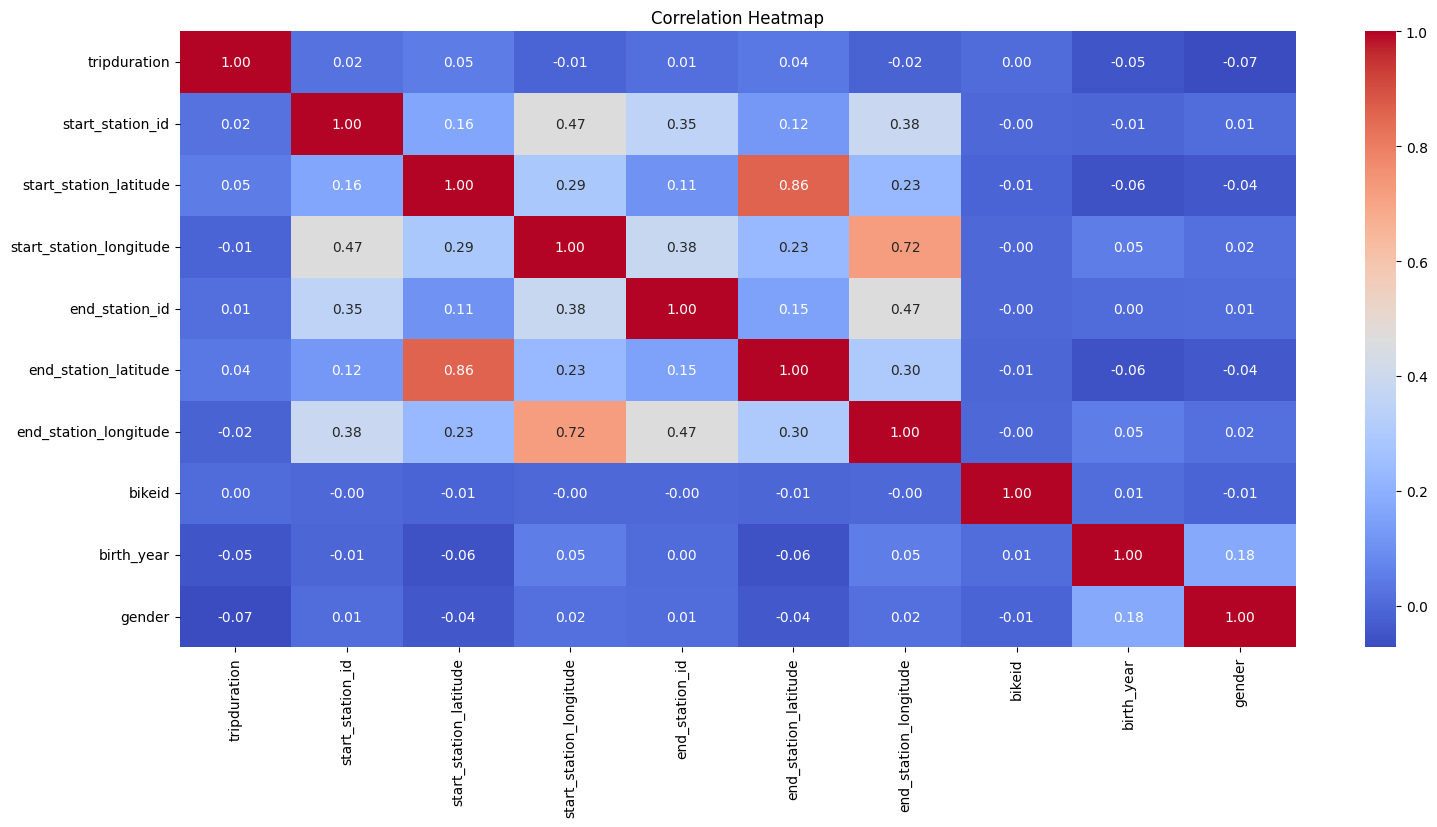

<Figure size 7000x4500 with 0 Axes>

In [14]:
# Select only the numerical columns in filtered_ds
numerical_columns = filtered_ds[['tripduration','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bikeid','birth_year','gender']]

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.figure(figsize=(70, 45))
plt.show()

The resulting correlation matrix doesn't show strong correlations between variables. 

So, now, let's transform the dataframe such that we aggregate the number of trips for every 30 minutes started and ended at each station.

In [15]:
ds2 = filtered_ds.copy()
# Set the 'starttime' column as the index
ds2.set_index('starttime', inplace=True)

# Resample the DataFrame to create 30-minute intervals and count trips
resampled = ds2.groupby(['start_station_id', pd.Grouper(freq='30Min')]).size().unstack(fill_value=0)

resampled = resampled.T

# Create a function to extract the station ID from the column name
def extract_station_id(col_name):
    try:
        return int(col_name.split('station')[1])
    except:
        return col_name

# Rename the columns using the function
resampled.columns = [f'station{extract_station_id(col)}' for col in resampled.columns]

ds_tripstart = resampled.sort_index()

ds3 = filtered_ds.copy()
# Set the 'starttime' column as the index
ds3.set_index('stoptime', inplace=True)

# Resample the DataFrame to create 30-minute intervals and count trips
resampled2 = ds3.groupby(['start_station_id', pd.Grouper(freq='30Min')]).size().unstack(fill_value=0)

resampled2 = resampled2.T

# Create a function to extract the station ID from the column name
def extract_station_id(col_name):
    try:
        return int(col_name.split('station')[1])
    except:
        return col_name

# Rename the columns using the function
resampled2.columns = [f'station{extract_station_id(col)}' for col in resampled2.columns]

ds_tripstop = resampled2.sort_index()

Now, let's see whether there is a correlation between various stations by considering both starting and ending trips.

In [16]:
#start trips
ds_tripstart.corr()

,station72.0,station79.0,station82.0,station83.0,station119.0,station120.0,station127.0,station128.0,station143.0,station144.0,...,station3709.0,station3711.0,station3712.0,station3714.0,station3715.0,station3716.0,station3718.0,station3719.0,station3720.0,station3721.0
station72.0,1.000000,0.493899,0.347144,0.349472,0.212262,0.346595,0.598795,0.607981,0.517029,0.349528,...,0.091264,0.078713,0.093326,0.012253,0.023037,-0.000427,0.028439,-0.009122,-0.007661,-0.006804
station79.0,0.493899,1.000000,0.326785,0.372935,0.178288,0.233926,0.596976,0.634351,0.494988,0.352552,...,0.108279,0.076489,0.062277,0.003527,0.029130,-0.000010,0.006838,-0.017145,-0.003748,-0.011587
station82.0,0.347144,0.326785,1.000000,0.226341,0.150236,0.211405,0.383723,0.388995,0.332545,0.222031,...,0.092969,0.105302,0.088202,0.033861,0.049221,0.016825,0.043673,0.009501,0.005980,-0.001748
station83.0,0.349472,0.372935,0.226341,1.000000,0.115797,0.199936,0.352853,0.401576,0.292091,0.265556,...,-0.171855,-0.176452,-0.139380,-0.083258,-0.115972,-0.037525,-0.079563,-0.049319,-0.028771,-0.045838
station119.0,0.212262,0.178288,0.150236,0.115797,1.000000,0.133198,0.239651,0.213351,0.205311,0.109618,...,0.037475,0.046015,0.054899,0.001464,0.015322,0.015074,0.030577,-0.000277,0.003398,-0.005310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
station3716.0,-0.000427,-0.000010,0.016825,-0.037525,0.015074,0.003220,0.007816,0.005908,0.009868,-0.003363,...,0.119474,0.130977,0.156266,0.094528,0.172502,1.000000,0.094657,0.085228,0.059392,0.044038
station3718.0,0.028439,0.006838,0.043673,-0.079563,0.030577,0.028670,0.039673,0.004182,0.049484,0.012432,...,0.258481,0.330366,0.327482,0.260647,0.269719,0.094657,1.000000,0.225093,0.178115,0.217483
station3719.0,-0.009122,-0.017145,0.009501,-0.049319,-0.000277,-0.014323,-0.016380,-0.014704,0.004471,-0.000512,...,0.146633,0.114761,0.132834,0.141863,0.187737,0.085228,0.225093,1.000000,0.072337,0.139756
station3720.0,-0.007661,-0.003748,0.005980,-0.028771,0.003398,-0.002379,0.000591,-0.015683,-0.001815,-0.003062,...,0.083970,0.089973,0.077902,0.064990,0.075750,0.059392,0.178115,0.072337,1.000000,0.110642


In [17]:
ds_tripstart

,station72.0,station79.0,station82.0,station83.0,station119.0,station120.0,station127.0,station128.0,station143.0,station144.0,...,station3709.0,station3711.0,station3712.0,station3714.0,station3715.0,station3716.0,station3718.0,station3719.0,station3720.0,station3721.0
starttime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 00:30:00,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 01:00:00,0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 01:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2018-12-31 22:00:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-31 22:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [18]:
#end trips 
ds_tripstop.corr()

,station72.0,station79.0,station82.0,station83.0,station119.0,station120.0,station127.0,station128.0,station143.0,station144.0,...,station3709.0,station3711.0,station3712.0,station3714.0,station3715.0,station3716.0,station3718.0,station3719.0,station3720.0,station3721.0
station72.0,1.000000,0.502858,0.343781,0.352190,0.211086,0.353266,0.605624,0.610988,0.512432,0.350314,...,0.087826,0.075257,0.091910,0.013186,0.026798,-0.003632,0.028361,-0.007756,-0.008382,-0.007500
station79.0,0.502858,1.000000,0.331672,0.391891,0.169522,0.243458,0.593290,0.636060,0.494551,0.349809,...,0.108385,0.077485,0.062328,0.002159,0.034618,0.006386,0.001700,-0.012594,-0.007892,-0.016032
station82.0,0.343781,0.331672,1.000000,0.234160,0.129968,0.219418,0.384702,0.393301,0.330902,0.225527,...,0.090110,0.104071,0.090406,0.034405,0.043076,0.007964,0.050522,0.003449,0.003916,0.004734
station83.0,0.352190,0.391891,0.234160,1.000000,0.114022,0.199711,0.363704,0.411030,0.298420,0.277860,...,-0.173636,-0.178597,-0.140830,-0.082989,-0.116728,-0.035875,-0.081073,-0.050645,-0.028881,-0.046428
station119.0,0.211086,0.169522,0.129968,0.114022,1.000000,0.141693,0.229860,0.208253,0.198458,0.117930,...,0.036955,0.041057,0.044303,0.004797,0.017107,0.007971,0.029643,0.001602,0.007430,-0.008901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
station3716.0,-0.003632,0.006386,0.007964,-0.035875,0.007971,0.006069,0.007125,0.002036,0.016774,-0.006266,...,0.124440,0.116868,0.129967,0.112474,0.166898,1.000000,0.107640,0.077480,0.044588,0.047613
station3718.0,0.028361,0.001700,0.050522,-0.081073,0.029643,0.029163,0.037889,0.000132,0.051845,0.009049,...,0.256765,0.331517,0.325883,0.239834,0.283586,0.107640,1.000000,0.234335,0.198982,0.234807
station3719.0,-0.007756,-0.012594,0.003449,-0.050645,0.001602,-0.007704,-0.013321,-0.015223,0.007948,-0.006415,...,0.143575,0.124304,0.145502,0.155914,0.186720,0.077480,0.234335,1.000000,0.066846,0.169547
station3720.0,-0.008382,-0.007892,0.003916,-0.028881,0.007430,-0.005266,0.000370,-0.013427,0.000414,0.004729,...,0.073344,0.084101,0.089168,0.056039,0.095538,0.044588,0.198982,0.066846,1.000000,0.104819


As we can see, there are many stations (815 of them), hence it is difficult to keep track of all the different degree of correlations between them. Therefore, we will cluster them into groups for the prediction challenge later.

After splitting the 24 hours into 15-minute intervals, we proceeded to create a plot that visualizes the number of requests to start and end trips within each time block throughout the entire year. This analysis was conducted to gain insights into peak hours of activity. Additionally, we categorized this information for each day of the week.

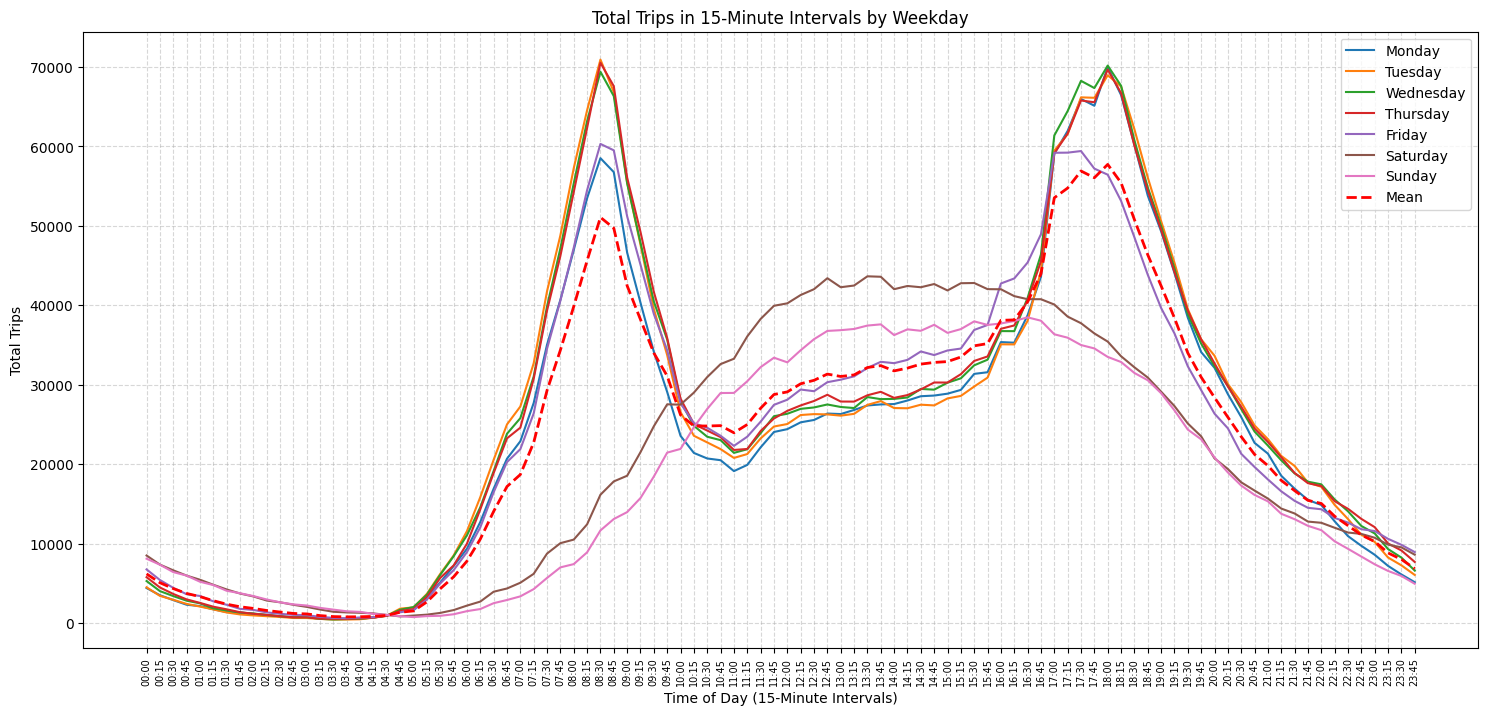

In [19]:
# Extract the weekday for both start and stop times (0 = Monday, 6 = Sunday)
filtered_ds['start_weekday'] = filtered_ds['starttime'].dt.weekday
filtered_ds['stop_weekday'] = filtered_ds['stoptime'].dt.weekday

# Extract the hour and minute and calculate the time in 15-minute intervals for both start and stop times
filtered_ds['start_time_block'] = filtered_ds['starttime'].dt.hour * 4 + filtered_ds['starttime'].dt.minute // 15
filtered_ds['stop_time_block'] = filtered_ds['stoptime'].dt.hour * 4 + filtered_ds['stoptime'].dt.minute // 15

# Create a time range for the x-axis
time_range = [f"{i // 4:02d}:{(i % 4) * 15:02d}" for i in range(24 * 4)]

# Create a dictionary to map weekdays to their names
weekday_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Group by weekday and time_block and count the number of trips
weekday_trip_counts = filtered_ds.groupby(['start_weekday', 'start_time_block']).size()

# Create a line plot for each weekday
for weekday, data in weekday_trip_counts.groupby('start_weekday'):
    time_range = [f"{i // 4:02d}:{(i % 4) * 15:02d}" for i in range(24 * 4)]
    plt.plot(time_range, data, label=weekday_names[weekday])

# Calculate and plot the mean line for each time slot
mean_lines = []
for i in range(len(time_range)):
    mean_value = weekday_trip_counts[:, i].mean()
    mean_lines.append(mean_value)

# Increase the thickness of the mean line
plt.plot(time_range, mean_lines, color='r', linestyle='--', label='Mean', linewidth=2)


plt.title('Total Trips in 15-Minute Intervals by Weekday')
plt.xlabel('Time of Day (15-Minute Intervals)')
plt.ylabel('Total Trips')
plt.xticks(range(len(time_range)), time_range, rotation=90, fontsize=7)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.show()

Now, we will display the same information per season.

In [20]:
# Extract the month for both start and stop times
filtered_ds['start_month'] = filtered_ds['starttime'].dt.month
filtered_ds['stop_month'] = filtered_ds['stoptime'].dt.month

# Define seasons based on the months
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Apply the get_season function to create a 'season' column
filtered_ds['season'] = filtered_ds['start_month'].apply(get_season)

# Group by season and time_block, and count the number of trips
seasonal_trip_counts = filtered_ds.groupby(['season', 'start_time_block']).size()

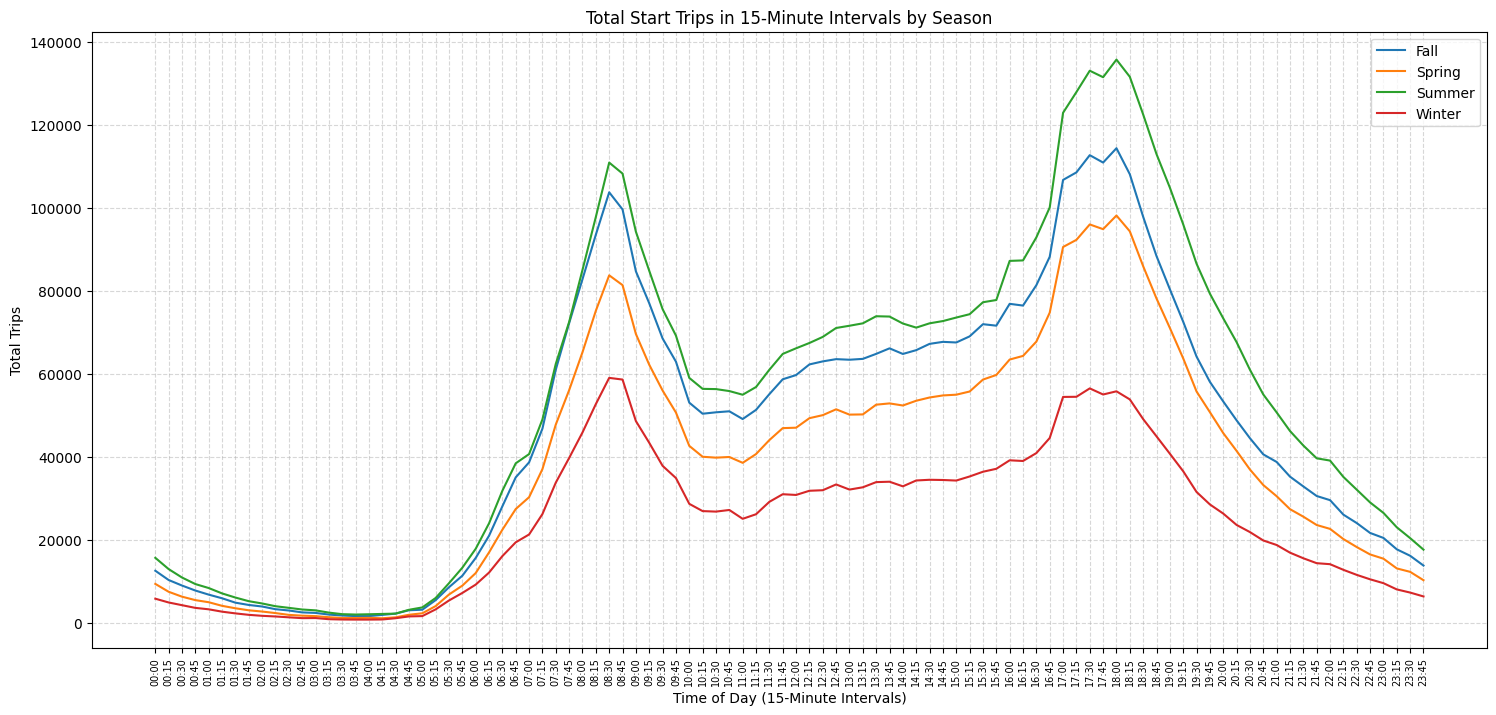

In [21]:
# Create a line plot for each season, counting both start and end trips
for season, data in seasonal_trip_counts.groupby('season'):
    time_range = [f"{i // 4:02d}:{(i % 4) * 15:02d}" for i in range(24 * 4)]
    plt.plot(time_range, data, label=season)

plt.title('Total Start Trips in 15-Minute Intervals by Season')
plt.xlabel('Time of Day (15-Minute Intervals)')
plt.ylabel('Total Trips')
plt.xticks(range(len(time_range)), time_range, rotation=90, fontsize=7)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

We can check the amount of trips per month.

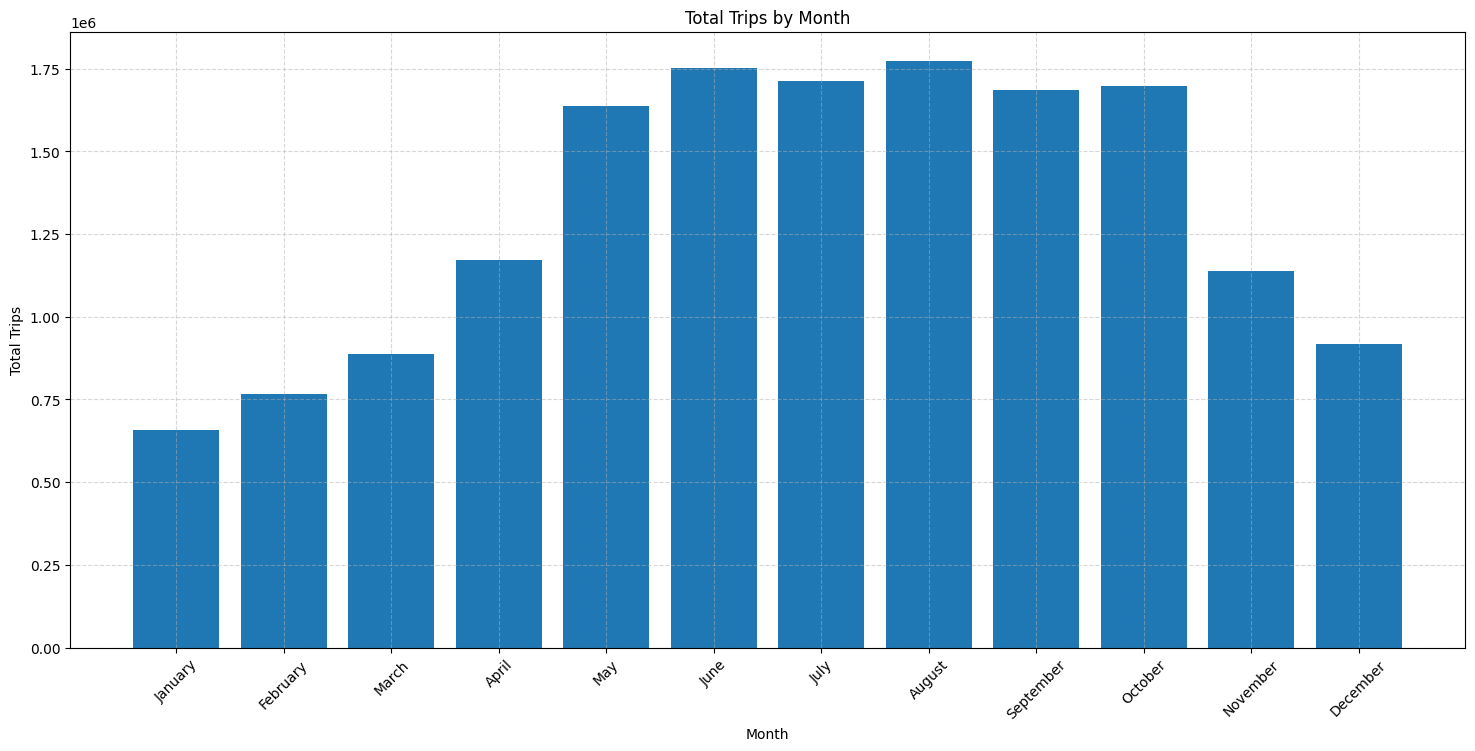

In [22]:
# List of month names
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July',
    'August', 'September', 'October', 'November', 'December'
]

# Group by month and count the total number of trips per month
monthly_trip_counts = filtered_ds.groupby(filtered_ds['starttime'].dt.month)['tripduration'].count()

# Create a bar plot for the total number of trips per month
plt.bar(month_names, monthly_trip_counts)

plt.title('Total Trips by Month')
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

Now, we want to generate a heatmap illustrating the spatial distribution of station activity. We will depict the quantity of start trips or end trips at each station, with color intensity indicating the level of activity.

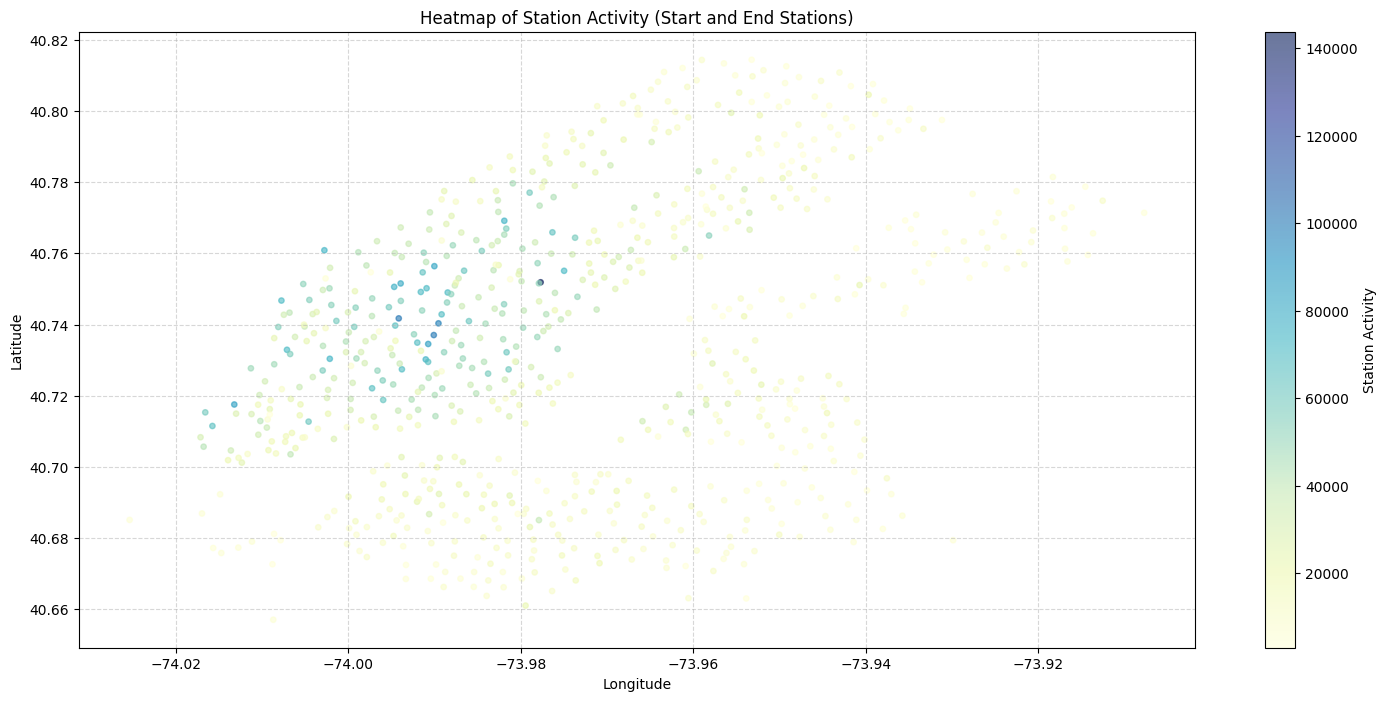

<Figure size 1800x800 with 0 Axes>

In [23]:
data = filtered_ds[['start_station_id', 'end_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']]

# Combine start and end station data
station_data = pd.concat([data[['start_station_id', 'start_station_latitude', 'start_station_longitude']],
                          data[['end_station_id', 'end_station_latitude', 'end_station_longitude']]])

# Count the number of trips associated with each station
station_activity = station_data.groupby(['start_station_id', 'start_station_latitude', 'start_station_longitude']).size().reset_index(name='activity')

# Calculate the min_activity_threshold as the 10th quantile of activity
min_activity_threshold = station_activity['activity'].quantile(0.1)

# Filter out stations with activity above the min_activity_threshold
significant_stations = station_activity[station_activity['activity'] > min_activity_threshold]

# Sort significant stations by activity in descending order
significant_stations = significant_stations.sort_values(by='activity', ascending=False)

# Create a heatmap using Matplotlib
scatter = plt.scatter(
    significant_stations['start_station_longitude'],
    significant_stations['start_station_latitude'],
    c=significant_stations['activity'],
    cmap='YlGnBu',
    s=15,  # Adjust the size of the points
    alpha=0.6,  # Adjust the transparency of the points
)

# Set labels and title
plt.title('Heatmap of Station Activity (Start and End Stations)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.figure()
# Add a colorbar to show the level of activity
cbar = plt.colorbar(scatter)
cbar.set_label('Station Activity')

plt.show()

Another option, which may convey the spatial information more meaningfully, is to visualize it directly on a map.

In [24]:
# Create a map centered around New York City (adjust the coordinates accordingly)
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Get the top 15 significant stations
top_15_stations = significant_stations.head(15)

# Create a HeatMap layer with latitude, longitude, and activity values
heat_data = [[row['start_station_latitude'], row['start_station_longitude'], row['activity']] for _, row in significant_stations.iterrows()]
HeatMap(heat_data).add_to(nyc_map)

# Add markers for the top 15 stations with station_id
for _, station in top_15_stations.iterrows():
    folium.Marker(
        location=[station['start_station_latitude'], station['start_station_longitude']],
        icon=folium.DivIcon(html=f"<div>{station['start_station_id']}</div>", icon_size=(20, 20)),
    ).add_to(nyc_map)

# Display the map
nyc_map

And finally, we aim to identify the starting stations for the longest trips as well as the end stations for the longest trips.

In [25]:
# Group data by start station ID and calculate total trip duration and trip counts
start_station_stats = filtered_ds.groupby('start_station_id').agg({'tripduration': ['sum', 'count']}).reset_index()

# Rename columns for start stations
start_station_stats.columns = ['start_station_id', 'total_duration', 'total_trips']

# Sort start stations by total trip duration in descending order and select the top 10
top_start_stations = start_station_stats.nlargest(10, 'total_duration')

# Calculate average trip duration-per-trip for start stations
top_start_stations['avg_duration_per_trip'] = round(top_start_stations['total_duration'] / top_start_stations['total_trips'], 2)

# Group data by end station ID and calculate total trip duration and trip counts
end_station_stats = filtered_ds.groupby('end_station_id').agg({'tripduration': ['sum', 'count']}).reset_index()

# Rename columns for end stations
end_station_stats.columns = ['end_station_id', 'total_duration', 'total_trips']

# Sort end stations by total trip duration in descending order and select the top 10
top_end_stations = end_station_stats.nlargest(10, 'total_duration')

# Calculate average trip duration-per-trip for end stations
top_end_stations['avg_duration_per_trip'] = round(top_end_stations['total_duration'] / top_end_stations['total_trips'],2)

# Display the top start stations
print("Top 10 Start Stations:")
print(top_start_stations)

# Display the top end stations
print("\nTop 10 End Stations:")
print(top_end_stations)

Top 10 Start Stations:
     start_station_id  total_duration  total_trips  avg_duration_per_trip
258             519.0    1.743085e+06       143773                  12.12
253             514.0    1.348196e+06        74791                  18.03
180             426.0    1.300646e+06        85283                  15.25
284            2006.0    1.131773e+06        64643                  17.51
240             497.0    1.094585e+06       100198                  10.92
160             402.0    1.092896e+06        97684                  11.19
186             435.0    1.042980e+06       101112                  10.32
222             477.0    1.011191e+06        82569                  12.25
292            3002.0    9.971006e+05        66459                  15.00
242             499.0    9.793299e+05        75662                  12.94

Top 10 End Stations:
     end_station_id  total_duration  total_trips  avg_duration_per_trip
258           519.0    1.711165e+06       144844                  11.

In [26]:
%%html
<a id='exploratory'></a>

# Section 2: Exploratory challenge



We focused on the following research question:

### *To what extent is there a correlation between station influence and proximity to a popular attraction in NYC? And at the same time, how can weather be used to predict demand of bikes?*

In [27]:
%%html
<a id='plot2'></a>

### 2.1: Plot the 10 most frequent and the 10 least frequent paths.

Let's define the functions that will help us get the map showing the most popular bike paths. In the process, two additional datasets will be imported to get information regarding the bike stations' names (and have additional information about their location within the city).

In [28]:
# Load the station information files
station_info_1 = pd.read_csv('201801-citibike-tripdata.csv', usecols=['start station id', 'start station name']).drop_duplicates()
station_info_2 = pd.read_csv('201802-citibike-tripdata.csv', usecols=['start station id', 'start station name']).drop_duplicates()

# Concatenate station information from both files
station_info = pd.concat([station_info_1, station_info_2]).drop_duplicates()

# Define a function to count paths and get average trip duration for each path
def count_paths_and_duration(dataframe):
    # Group by the start and end station coordinates and calculate the counts and average tripduration
    path_groups = dataframe.groupby(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])
    path_counts = path_groups.size()
    avg_trip_duration = path_groups['tripduration'].mean()
    return path_counts, avg_trip_duration

# Define a function to plot the most frequent paths using folium
def folium_plot_frequent_paths(dataframe, path_counts, avg_trip_duration, n=10, most_frequent=True):
    paths = path_counts.nlargest(n) if most_frequent else path_counts.nsmallest(n)
    
    avg_lat = dataframe['start_station_latitude'].mean()
    avg_lon = dataframe['start_station_longitude'].mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=13)

    for (start_lat, start_lon, end_lat, end_lon), count in paths.items():
        duration = avg_trip_duration.loc[(start_lat, start_lon, end_lat, end_lon)]
        line = folium.PolyLine(
            locations=[(start_lat, start_lon), (end_lat, end_lon)],
            color='blue',
            weight=5,
            opacity=0.7,
            tooltip=f'Path (Count: {count}, Avg Duration: {duration:.2f} sec)'
        )
        line.add_to(m)

        # Retrieve the station_id and station_name using vectorized operations
        start_station_info = station_info[station_info['start station id'] == dataframe.loc[(dataframe['start_station_latitude'] == start_lat) & (dataframe['start_station_longitude'] == start_lon), 'start_station_id'].iloc[0]]
        end_station_info = station_info[station_info['start station id'] == dataframe.loc[(dataframe['end_station_latitude'] == end_lat) & (dataframe['end_station_longitude'] == end_lon), 'end_station_id'].iloc[0]]

        start_popup = f'Start: {start_lat, start_lon}\n\nStation ID: {start_station_info["start station id"].values[0]}\n\nStation Name: {start_station_info["start station name"].values[0]}\n\nAvg Trip Duration: {duration:.2f} mins'
        end_popup = f'End: {end_lat, end_lon}\n\nStation ID: {end_station_info["start station id"].values[0]}\n\nStation Name: {end_station_info["start station name"].values[0]}\n\nAvg Trip Duration: {duration:.2f} mins'

        folium.Marker(
            location=(start_lat, start_lon),
            icon=folium.Icon(color='green', icon='play', prefix='fa'),
            popup=start_popup,
        ).add_to(m)

        folium.Marker(
            location=(end_lat, end_lon),
            icon=folium.Icon(color='red', icon='stop', prefix='fa'),
            popup=end_popup,
        ).add_to(m)

    return m

Now, let's plot the top 10 most common bike routes throughout the city along with its renowned attractions simultaneously.

In [29]:
data = filtered_ds

# Count the paths and get average trip duration
path_counts, avg_trip_duration = count_paths_and_duration(data)

# Use the top 10 most frequent paths for plotting as an example
map_plot = folium_plot_frequent_paths(data, path_counts, avg_trip_duration, 10)

# List of important landmarks in NYC with their names and approximate coordinates
important_landmarks = [
    {"name": "Times Square", "latitude": 40.7580, "longitude": -73.9855},
    {"name": "Rockefeller Center", "latitude": 40.7587, "longitude": -73.9787},
    {"name": "9/11 Memorial", "latitude": 40.7115, "longitude": -74.0134},
    {"name": "Grand Central Station", "latitude": 40.7527, "longitude": -73.9772},
    {"name": "Statue of Liberty", "latitude": 40.6892, "longitude": -74.0445},
    {"name": "The Metropolitan Museum of Art", "latitude": 40.7794, "longitude": -73.9632},
    {"name": "Central Park", "latitude": 40.785091, "longitude": -73.968285},
    {"name": "Empire State Building", "latitude": 40.748817, "longitude": -73.985428},
    {"name": "Brooklyn Bridge", "latitude": 40.7061, "longitude": -73.9969}
]


# Adding markers for each important landmark
for landmark in important_landmarks:
    folium.Marker(
        [landmark["latitude"], landmark["longitude"]],
        popup=landmark["name"]
    ).add_to(map_plot)

# Display the map
map_plot

We can notice that proximity to a major attraction could serve as a predictor for end stations.

In [30]:
%%html
<a id='pca2'></a>

### 2.2: PCA (Principal Component Analysis)

After identifying the top 10 routes, our next step is to investigate the principal factors influencing them. To conduct this analysis, we employ PCA. It is essential to base the analysis on a specific list, so we save the top 10 routes as a list for this purpose.

In [31]:
#Save the top_10_path data

def get_top_paths_with_info(dataframe, station_info, path_counts, top_n=10):
    frequent_paths = dict(path_counts.most_common(top_n))
    top_paths_list = []

    for (start, end), count in frequent_paths.items():
        start_station_id = int(dataframe[(dataframe['start_station_latitude'] == start[0]) & (dataframe['start_station_longitude'] == start[1])]['start_station_id'].values[0])
        end_station_id = int(dataframe[(dataframe['end_station_latitude'] == end[0]) & (dataframe['end_station_longitude'] == end[1])]['end_station_id'].values[0])

        start_station_name = station_info[station_info['start station id'] == start_station_id]['start station name'].values[0]
        end_station_name = station_info[station_info['start station id'] == end_station_id]['start station name'].values[0]

        path_info = {
            'start_location': start,
            'end_location': end,
            'start_station_id': start_station_id,
            'end_station_id': end_station_id,
            'start_station_name': start_station_name,
            'end_station_name': end_station_name,
            'path_count': count
        }

        top_paths_list.append(path_info)

    return top_paths_list

# Define a function to count paths
def count_paths(dataframe):
    paths = dataframe.apply(lambda row: ((row['start_station_latitude'], row['start_station_longitude']),
                                         (row['end_station_latitude'], row['end_station_longitude'])), axis=1)
    
    path_counts = Counter(paths)
    return path_counts

# first, we calculate the number of paths
path_counts = count_paths(ds)

# sue the function to get the list of the top_10 paths
top_paths = get_top_paths_with_info(ds, station_info, path_counts, top_n=10)

# top_paths now is a list including the paths information

Explained variance ratio: [0.27742141 0.15458921 0.11765501 0.10010231 0.09660532 0.08255236
 0.06715728 0.06425485]


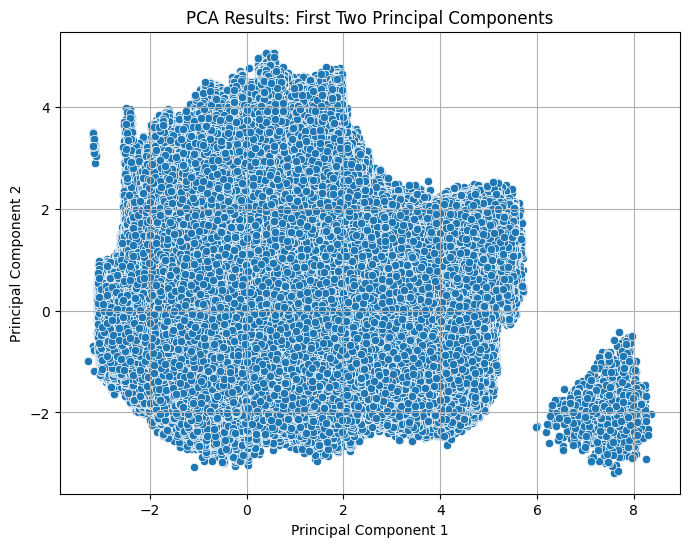

In [32]:
# Check for missing values in the dataset and fill them
numerical_columns = numerical_columns.fillna(numerical_columns.mean())

# Standardize the numerical features
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns)

# Apply PCA, here we choose to retain enough components to explain 95% of the variance of the original variables
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(numerical_columns_scaled)

# Convert the PCA results to a DataFrame
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)])

# Print the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Visualize the first two principal components of the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Results: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


The image displays a scatter plot of the first two principal components obtained from a PCA analysis, along with the explained variance ratio for each component.

The explained variance ratio is a list of values, each representing the proportion of the dataset's variance that is accounted for by each principal component. 

The scatter plot itself shows the data points projected onto the first two principal components. This kind of visualization helps to understand the data's underlying structure, revealing patterns, clusters, or outliers that might not be apparent in the high-dimensional space. Each point represents an observation from the dataset, positioned according to its values for the two principal components, which are the axes of the graph.

Principal Component 1 (PC1) is on the x-axis, and Principal Component 2 (PC2) is on the y-axis. The spread of the points along these axes corresponds to the variance captured by each principal component. For example, if most points are spread out along PC1, this component accounts for a significant portion of the variation in the dataset.

In this plot, we can see that the data points are more spread out along the PC1 axis compared to PC2, which suggests that PC1 captures more variability within the dataset. Moreover, some points are far away from the origin along both axes, which may indicate outliers or groups of distinct observations.

In [33]:
# Convert top_paths to DataFrame
top_paths_df = pd.DataFrame(top_paths)

# Extract latitude and longitude from start_location and end_location
top_paths_df['start_station_latitude'] = top_paths_df['start_location'].apply(lambda loc: loc[0])
top_paths_df['start_station_longitude'] = top_paths_df['start_location'].apply(lambda loc: loc[1])
top_paths_df['end_station_latitude'] = top_paths_df['end_location'].apply(lambda loc: loc[0])
top_paths_df['end_station_longitude'] = top_paths_df['end_location'].apply(lambda loc: loc[1])

# Select features
features = ['start_station_latitude', 'start_station_longitude', 
            'end_station_latitude', 'end_station_longitude', 'start_station_id', 'end_station_id']
data_for_pca = top_paths_df[features]

# Check for missing values and fill them
data_for_pca = data_for_pca.fillna(data_for_pca.mean())

# Standardize the numerical features
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(data_for_pca)

# Apply PCA, choosing enough components to explain 95% of the variance in the original variables
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(numerical_columns_scaled)

# Convert the PCA results to a DataFrame for easy handling
pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)])

# Print the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Print the cumulative explained variance ratio to understand the cumulative contribution of the principal components
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print(f"Cumulative explained variance ratio: {cumulative_variance_ratio}")

Explained variance ratio: [0.43156653 0.30844402 0.15917755 0.08320242]
Cumulative explained variance ratio: [0.43156653 0.74001055 0.8991881  0.98239052]


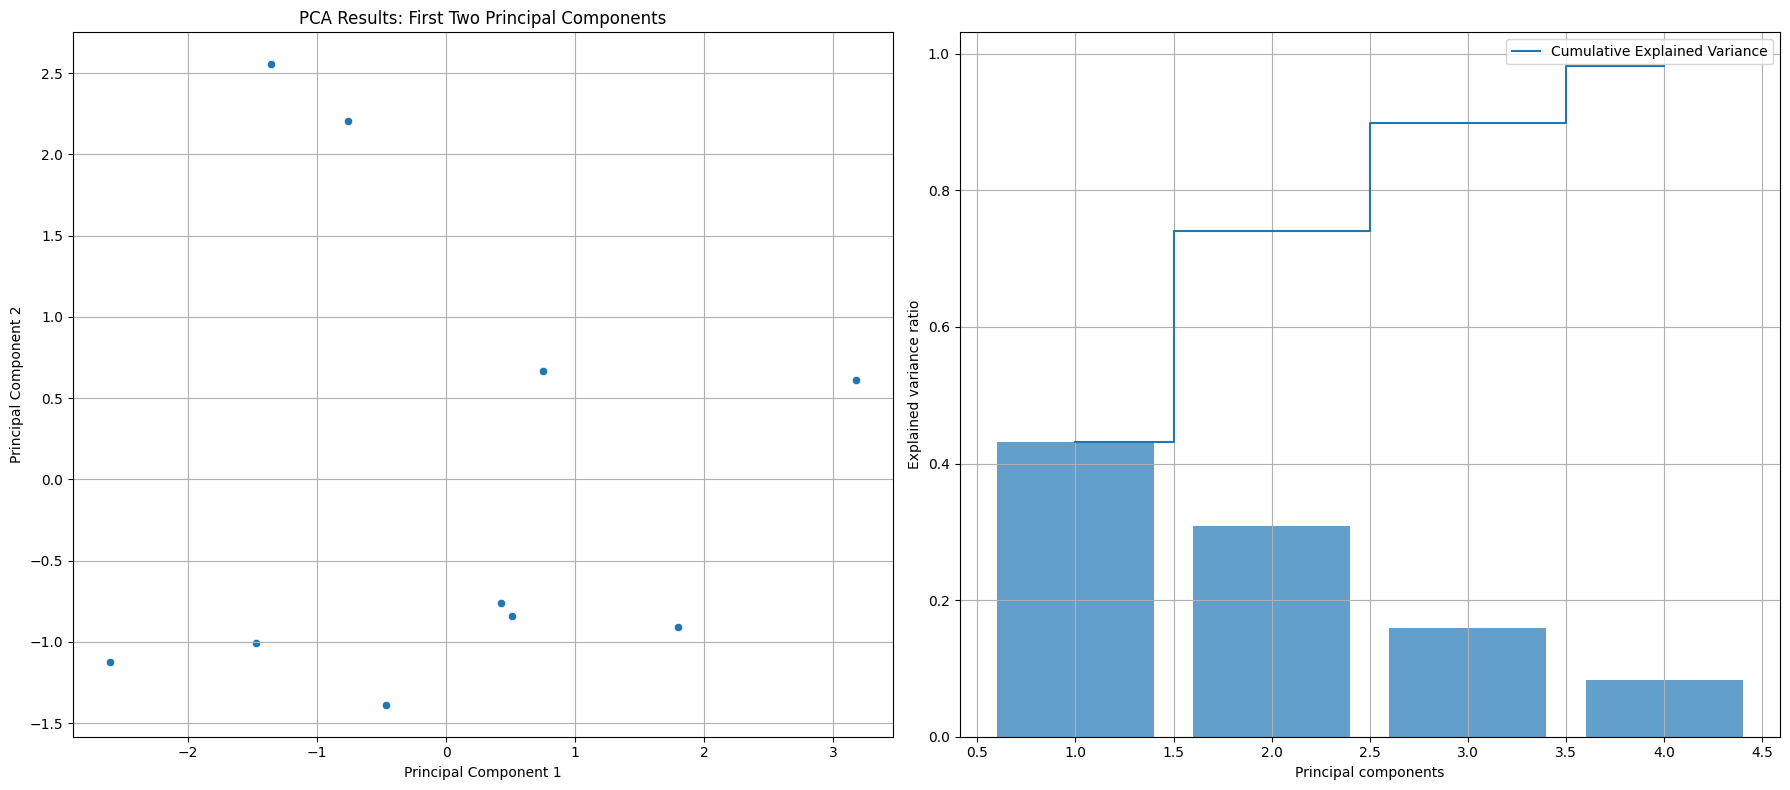

In [34]:
# Setting up a grid layout
fig = plt.figure()
gs = GridSpec(1, 2, figure=fig)

# First plot: PCA Results
ax1 = fig.add_subplot(gs[0, 0])
sns.scatterplot(x='PC1', y='PC2', data=pca_df, ax=ax1)
ax1.set_title('PCA Results: First Two Principal Components')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.grid(True)

# Second plot: Explained Variance Ratio
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
ax2.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative Explained Variance')
ax2.set_ylabel('Explained variance ratio')
ax2.set_xlabel('Principal components')
ax2.legend(loc='best')
ax2.grid(True)

plt.tight_layout()
plt.show()

The results indicate that the first two factors account for 60% of the outcome, and employing four components explains 95% of the outcome. To understand the specific factors influencing the outcome, additional knowledge is necessary.

A good alternative information to be considered is the weather. For example, importing a dataset related to the month of January (which could be extended to the whole year).

In [35]:
# loading the data
file_path = 'dataweather.xlsx'
data_new = pd.read_excel(file_path, skiprows=4)

# Extracting relevant columns and renaming them
data_new = data_new[['Unnamed: 4', 'Unnamed: 6', 'Unnamed: 20']]
data_new.columns = ['Date', 'Avg_Temp_F', 'Total_Precipitation_Inches']

# Dropping the first two rows which are headers, not data
data_new = data_new.iloc[2:]

# Convert Fahrenheit to Celsius and inches to mm
data_new['Avg_Temp_C'] = (data_new['Avg_Temp_F'].astype(float) - 32) * 5.0 / 9.0
data_new['Total_Precipitation_mm'] = data_new['Total_Precipitation_Inches'].astype(float) * 25.4

# Handling date format
data_new['Date'] = pd.to_datetime(data_new['Date'], format='%d', errors='coerce').dt.strftime('%d')
data_new.dropna(subset=['Date'], inplace=True)  # Dropping any rows where date conversion failed

In [36]:
# Filter data for January only
january_data = data[data['starttime'].dt.month == 1].copy()

# Use .loc to ensure the modification is done on the slice
january_data.loc[:, 'start_day'] = january_data['starttime'].dt.day

# Counting the number of trips per day
trips_per_day = january_data.groupby('start_day').size()

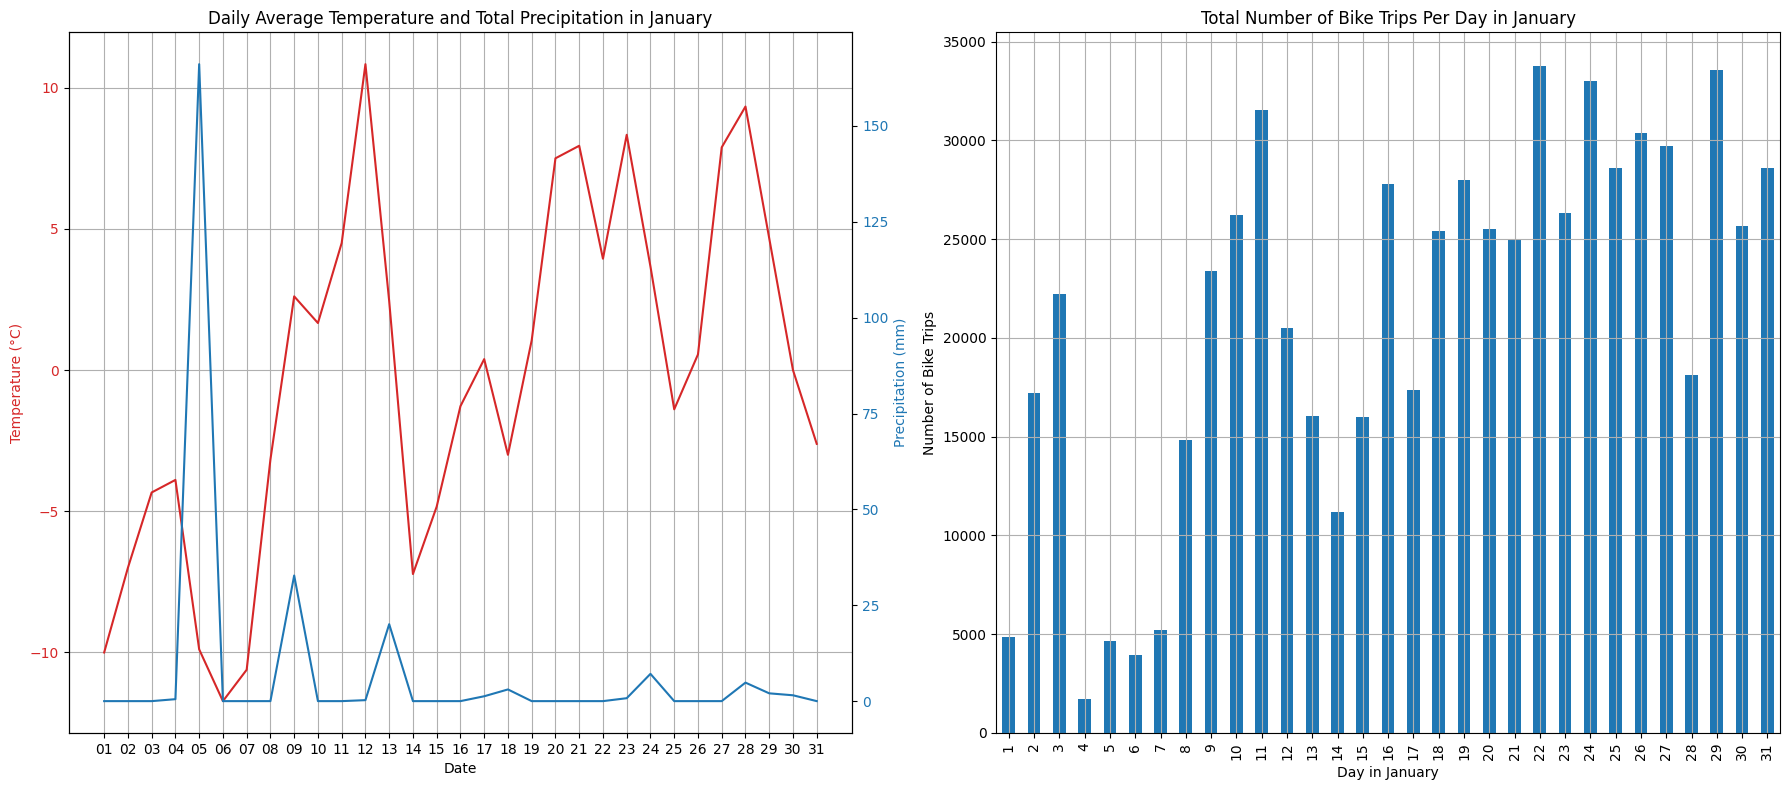

In [37]:
# Plotting
fig = plt.figure()
gs = GridSpec(1, 2, figure=fig)

# First plot: Temperature and Precipitation
ax1 = fig.add_subplot(gs[0, 0])

# Plotting temperature
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(data_new['Date'], data_new['Avg_Temp_C'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Instantiating a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precipitation (mm)', color=color)
ax2.plot(data_new['Date'], data_new['Total_Precipitation_mm'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Daily Average Temperature and Total Precipitation in January')

# Second plot: Number of Bike Trips
ax3 = fig.add_subplot(gs[0, 1])
trips_per_day.plot(kind='bar', ax=ax3)
ax3.set_xlabel('Day in January')
ax3.set_ylabel('Number of Bike Trips')
ax3.set_title('Total Number of Bike Trips Per Day in January')
ax3.grid(True)

plt.tight_layout()
plt.show()

While the utility of temperature on bike trip predictions remains uncertain, precipitation data can play a role. Higher precipitation values correspond to a decrease in the number of bike trips, highlighting its significance in the prediction model.

In [38]:
%%html
<a id='prediction'></a>
<a id='cluster3'></a>

# Section 3: Prediction Challenge

We will, in this part, predict the demand for the bike-sharing system (number of dropoffs and pickups).

## Part 3.1: Clustering

We are going to use the **KMeans clustering algorithm** to perform the clustering because of all its advantages:

*    Unsupervised Learning: KMeans is an unsupervised learning technique, allowing it to unveil data patterns without the need for predefined labels.

*    Group Discovery: When there are inherent data clusters, KMeans can pinpoint these groups and assign data points based on their similarities.

*    Simplicity and Implementation Ease: KMeans is a straightforward algorithm, focusing on minimizing the sum of squared distances within clusters.

*    Scalability and Efficiency: KMeans often performs efficiently on large datasets, and optimized versions can handle very extensive data.

*   Partitioning Feature Space: In applications like geographic analysis or market segmentation, partitioning data by features, such as location, can be valuable.

*   Creation of New Features: Clustering can generate new features that serve as inputs for other machine learning models.

*    Interpretability: The clusters produced by KMeans are easily visualized and interpreted, especially in lower-dimensional spaces.

For example, using latitude and longitude as features for KMeans clustering can help identify geographically similar shared bike start stations, which can be applied in diverse scenarios, including market segmentation, operational optimization and demand forecasting.


In [39]:
clustered_data = filtered_ds

## Select the latitude and longitude features for clustering
features = clustered_data[['start_station_latitude', 'start_station_longitude']].drop_duplicates().reset_index(drop=True)

# Initialize KMeans with 20 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=20, random_state=35, n_init=10)

# Fit the KMeans model on the features and predicting cluster assignments for each data point
features['Cluster'] = kmeans.fit_predict(features)
clustered_data['Cluster'] = kmeans.predict(clustered_data[['start_station_latitude', 'start_station_longitude']])

# Retrieve the cluster assignments for each data point from the 'prediction_data' DataFrame
clusters = clustered_data['Cluster']

# Access the central points of each cluster generated by the KMeans algorithm
centers = kmeans.cluster_centers_

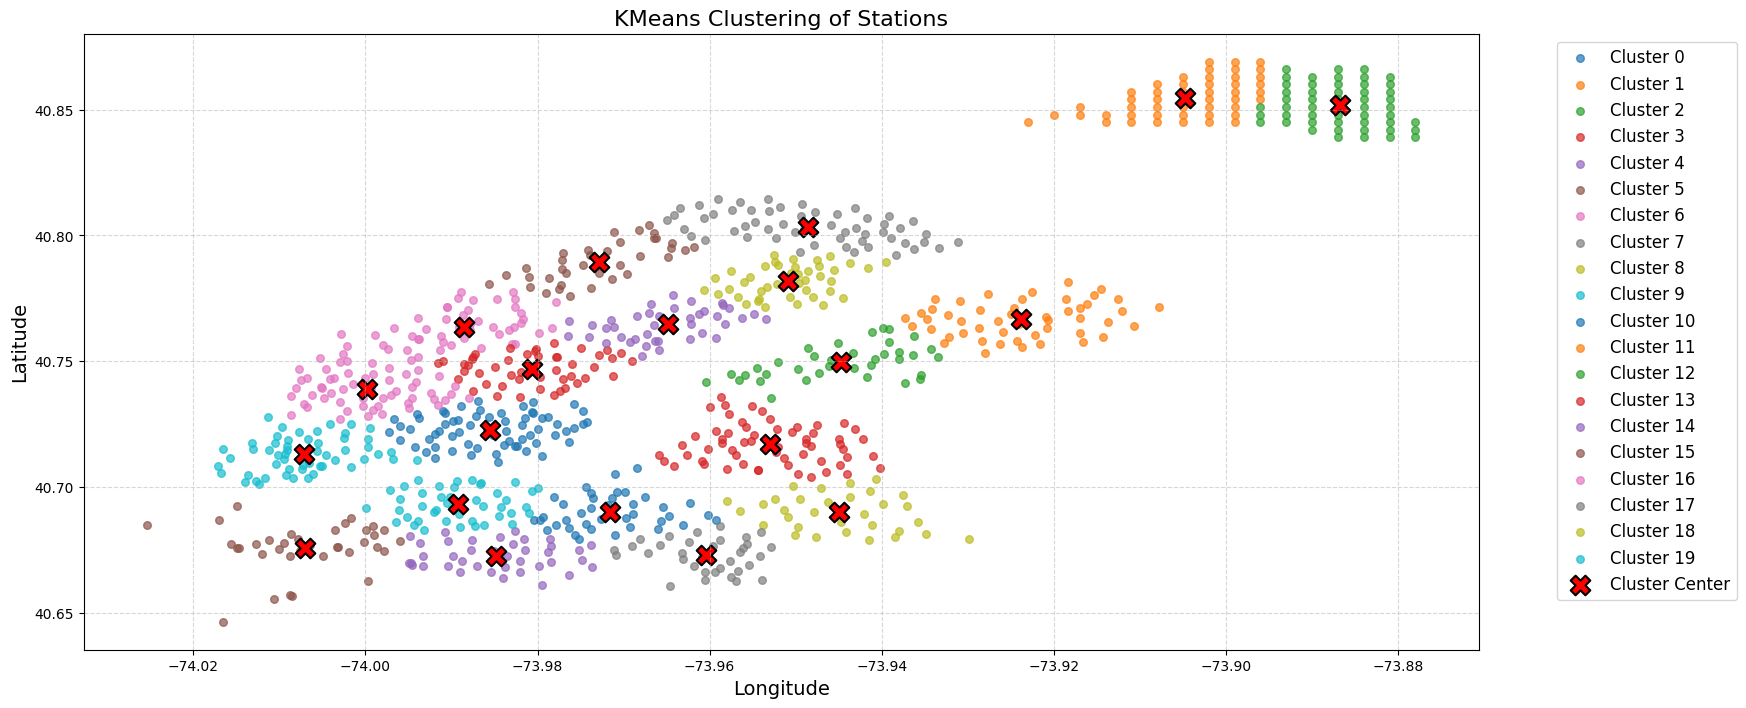

In [40]:
#Add the color and the label
for cluster in range(20):
    cluster_points = features[features["Cluster"] == cluster]
    plt.scatter(
        cluster_points['start_station_longitude'],
        cluster_points['start_station_latitude'],
        label=f'Cluster {cluster}', alpha=0.7, s=30  
    )

# Add the center
plt.scatter(
    centers[:, 1], centers[:, 0],
    s=200, c='red', marker='X',
    label='Cluster Center', edgecolors='black', linewidths=1.5  
)

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# x and y labels
plt.title('KMeans Clustering of Stations', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Adjust the position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

In [41]:
stations_per_cluster = {}
for c in range(20):
    print(f"Cluster {c} has {len(list(set(clustered_data[clustered_data['Cluster'] == c]['start_station_id'])))} stations.")
    stations_per_cluster[c] = len(list(set(clustered_data[clustered_data['Cluster'] == c]['start_station_id'])))

Cluster 0 has 65 stations.
Cluster 1 has 701 stations.
Cluster 2 has 36 stations.
Cluster 3 has 60 stations.
Cluster 4 has 40 stations.
Cluster 5 has 37 stations.
Cluster 6 has 46 stations.
Cluster 7 has 55 stations.
Cluster 8 has 33 stations.
Cluster 9 has 54 stations.
Cluster 10 has 39 stations.
Cluster 11 has 49 stations.
Cluster 12 has 1159 stations.
Cluster 13 has 47 stations.
Cluster 14 has 41 stations.
Cluster 15 has 36 stations.
Cluster 16 has 58 stations.
Cluster 17 has 34 stations.
Cluster 18 has 42 stations.
Cluster 19 has 44 stations.


Then, clusters 1 and 12 could be outliers.

We just displayed the **KMeans clustering results** in the form of a scatter plot, where data points were grouped into clusters based on their geographical coordinates.

Now, we can perform an analysis:

Selected cluster Statistics:
       start_station_latitude  start_station_longitude  Cluster
count               65.000000                65.000000     65.0
mean                40.722873               -73.985517      0.0
std                  0.006150                 0.006212      0.0
min                 40.710155               -73.997249      0.0
25%                 40.717821               -73.990697      0.0
50%                 40.723077               -73.985180      0.0
75%                 40.727464               -73.980680      0.0
max                 40.734232               -73.974225      0.0


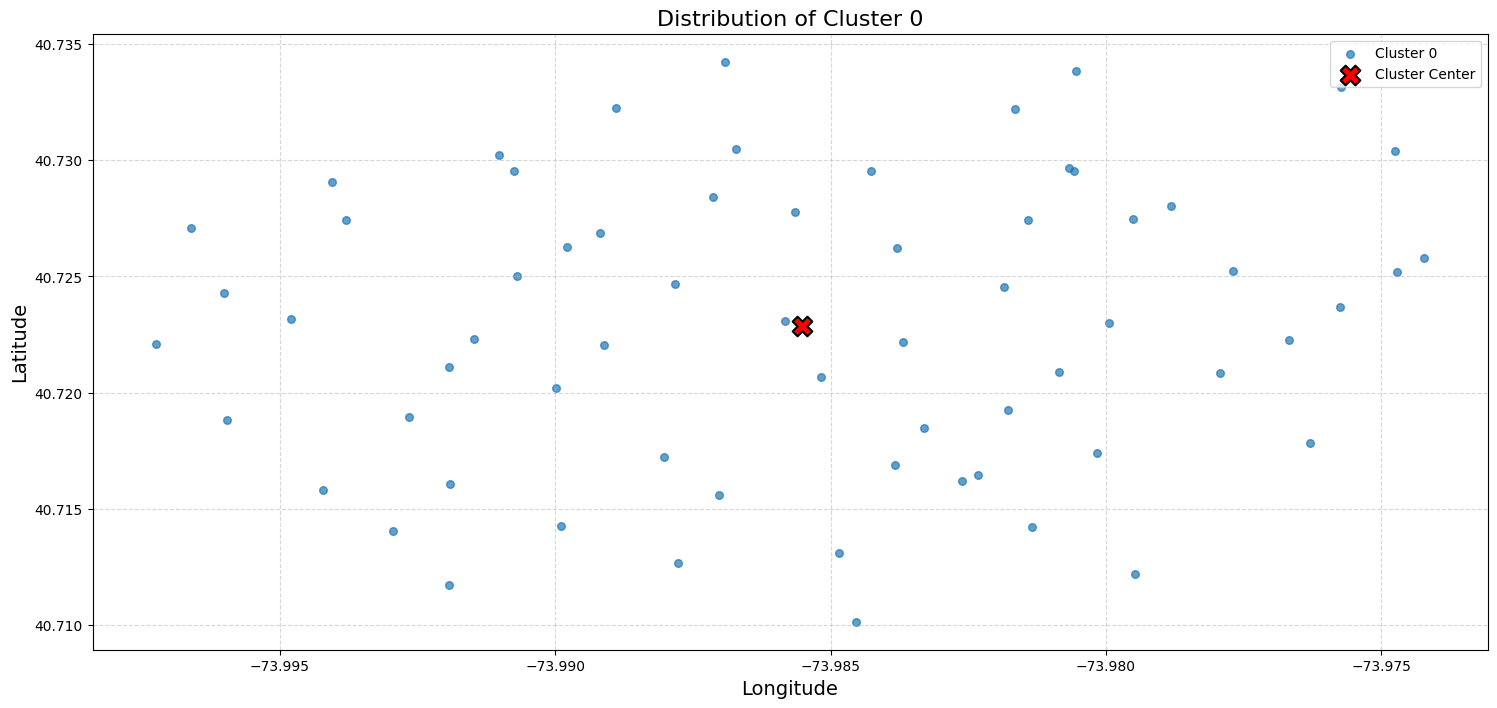

In [42]:
## Analysis
# Extract the subset of features that belong to cluster 0
selected_cluster = features[features['Cluster'] == 0]

# Print statistical summary for cluster 0
print("Selected cluster Statistics:")
print(selected_cluster.describe())
plt.figure()

# Plot the geographical points of cluster 0 using their longitude and latitude
# 'alpha' controls the transparency and 's' controls the size of the points
plt.scatter(
    selected_cluster['start_station_longitude'], 
    selected_cluster['start_station_latitude'], 
    label='Cluster 0', 
    alpha=0.7, 
    s=30
)

# Plot the center of cluster 1
# 's' sets the size of the center point, 'c' sets the color, and 'marker' specifies the symbol
plt.scatter(
    centers[0, 1], centers[0, 0],
    s=200, c='red', marker='X',
    label='Cluster Center', edgecolors='black', linewidths=1.5
)
#Enable the grid on the plot for better readability, with custom linestyle and transparency
plt.grid(True, linestyle='--', alpha=0.5)


# Set the title of the plot and the labels for x and y axes with font size
plt.title('Distribution of Cluster 0', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend()
plt.show()

In [43]:
%%html
<a id='modeling3'></a>

## Part 3.2: Modeling for predicting

We will use the **Random Forest** model for our project, advantageous for numerous reasons:

* Strong Performance: Random Forests typically yield high accuracy by aggregating predictions from multiple decision trees.

*    Overfitting Prevention: They reduce overfitting compared to individual decision trees, enhancing model robustness for complex datasets.

*    Feature Importance: Random Forests estimate feature importance, aiding in identifying key predictors.

*    Flexibility: They can handle classification and regression tasks, as well as numerical and categorical features, without the need for feature scaling.

*    Ease of Use: Implementation in libraries like Scikit-learn is user-friendly and requires minimal configuration.

*    Parallel Processing: The algorithm is easily parallelizable, making it efficient on multi-core processors.

*    Handling Missing Data: Random Forests can manage missing values effectively during tree construction.

*    Modeling Non-Linear Relationships: They capture non-linear relationships, a valuable capability for many practical problems.

*    No need of standardization of features (thanks to it being a tree-based algorithm).

However, Random Forests have limitations. They can be memory and computation-intensive, especially with many trees or large datasets. Their results may be less interpretable compared to single decision trees due to multiple tree predictions to consider.

We start to do the modeling:

In [44]:
# Convert the cluster labels to integer type and assign them to the 'Cluster' column in the DataFrame
clustered_data['Cluster'] = clusters.astype(int)

# Extract the hour from the 'starttime' column and create a new 'hour' column
#We use hour as a discrete numerical feature because we are going to use a tree-based prediction algrithm
clustered_data['hour'] = clustered_data['starttime'].dt.hour

# Extract the day from the 'starttime' column and create a new 'weekDay' column
clustered_data['weekDay'] = clustered_data['starttime'].dt.weekday

# Extract the date from the 'starttime' column and create a new 'date' column
clustered_data['date'] = clustered_data['starttime'].dt.date

# Extract the month from the 'starttime' column and create a new 'month' column
clustered_data['month'] = clustered_data['starttime'].dt.month
clustered_data

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,...,start_time_block,stop_time_block,start_month,stop_month,season,Cluster,hour,weekDay,date,month
0,16.166667,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,...,55,56,1,1,Winter,6,13,0,2018-01-01,1
1,12.050000,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,...,62,63,1,1,Winter,6,15,0,2018-01-01,1
2,8.266667,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,...,62,63,1,1,Winter,6,15,0,2018-01-01,1
3,5.100000,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,...,62,63,1,1,Winter,6,15,0,2018-01-01,1
4,5.100000,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,...,72,73,1,1,Winter,6,18,0,2018-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548329,13.300000,2018-12-31 23:49:37.059,2019-01-01 00:02:55.164,518.0,40.747804,-73.973442,3709.0,40.738046,-73.996430,35603,...,95,0,12,1,Winter,13,23,0,2018-12-31,12
17548330,5.200000,2018-12-31 23:49:43.952,2018-12-31 23:54:56.251,3166.0,40.780578,-73.985624,3164.0,40.777057,-73.978985,27419,...,95,95,12,12,Winter,5,23,0,2018-12-31,12
17548332,17.116667,2018-12-31 23:51:13.922,2019-01-01 00:08:21.790,423.0,40.765849,-73.986905,285.0,40.734546,-73.990741,28510,...,95,0,12,1,Winter,6,23,0,2018-12-31,12
17548333,2.900000,2018-12-31 23:53:59.072,2018-12-31 23:56:53.475,260.0,40.703652,-74.011678,260.0,40.703652,-74.011678,33887,...,95,95,12,12,Winter,9,23,0,2018-12-31,12


In [45]:
# Find the unique station ids present in the selected cluster
station_ids_selected_cluster = list(set(clustered_data[clustered_data['Cluster'] == 0]['start_station_id']))

# Creating X_train for departures
departure_X_train_selected_cluster = clustered_data[clustered_data['Cluster'] == 0]

# Creating X_train for arrivals
arrival_X_train_selected_cluster = clustered_data[clustered_data['end_station_id'].isin(station_ids_selected_cluster)]

In [46]:
arrival_X_train_selected_cluster

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,...,start_time_block,stop_time_block,start_month,stop_month,season,Cluster,hour,weekDay,date,month
39,22.083333,2018-01-02 19:11:45.344,2018-01-02 19:33:51.194,72.0,40.767272,-73.993929,487.0,40.733143,-73.975739,26382,...,76,78,1,1,Winter,6,19,1,2018-01-02,1
115,30.583333,2018-01-05 18:46:08.194,2018-01-05 19:16:43.547,72.0,40.767272,-73.993929,504.0,40.732219,-73.981656,14820,...,75,77,1,1,Winter,6,18,4,2018-01-05,1
208,22.850000,2018-01-09 19:15:44.587,2018-01-09 19:38:36.420,72.0,40.767272,-73.993929,487.0,40.733143,-73.975739,25047,...,77,78,1,1,Winter,6,19,1,2018-01-09,1
273,25.816667,2018-01-10 19:30:55.083,2018-01-10 19:56:44.443,72.0,40.767272,-73.993929,297.0,40.734232,-73.986923,17593,...,78,79,1,1,Winter,6,19,2,2018-01-10,1
325,24.616667,2018-01-11 20:11:29.041,2018-01-11 20:36:06.271,72.0,40.767272,-73.993929,487.0,40.733143,-73.975739,32656,...,80,82,1,1,Winter,6,20,3,2018-01-11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548306,10.133333,2018-12-31 23:25:09.081,2018-12-31 23:35:17.574,296.0,40.714131,-73.997047,341.0,40.717821,-73.976289,17851,...,93,94,12,12,Winter,9,23,0,2018-12-31,12
17548307,15.966667,2018-12-31 23:27:59.065,2018-12-31 23:43:57.879,3701.0,40.708318,-74.005041,411.0,40.722281,-73.976687,34772,...,93,94,12,12,Winter,9,23,0,2018-12-31,12
17548317,5.100000,2018-12-31 23:36:51.092,2018-12-31 23:41:57.366,82.0,40.711174,-74.000165,340.0,40.712690,-73.987763,15864,...,94,94,12,12,Winter,9,23,0,2018-12-31,12
17548321,16.916667,2018-12-31 23:39:10.727,2018-12-31 23:56:06.692,379.0,40.749156,-73.991600,301.0,40.722174,-73.983688,34170,...,94,95,12,12,Winter,13,23,0,2018-12-31,12


In [47]:
# Group the data by 'hour' and 'date' and count the number of departures for each group
# Reset the index to turn the series into a DataFrame
departures_per_hour = departure_X_train_selected_cluster.groupby(['date','month','weekDay','hour']).count()['start_station_id'].reset_index(name='departures')

# Group the data by 'hour' and 'date' and count the number of arrivals for each group
# Reset the index to turn the series into a DataFrame
arrivals_per_hour = arrival_X_train_selected_cluster.groupby(['date','month','weekDay','hour']).count()['end_station_id'].reset_index(name='arrivals')


Then, we want to *'fill in'* the gaps within the time series and then conduct an effective lagged feature.

In [48]:
# Create an empty DataFrame with all combinations of dates and hours DEPARTURES
list_for_df_full_date = [ [date, hour] for date in departures_per_hour['date'].unique() for hour in range(24)]
full_date_range = pd.DataFrame(list_for_df_full_date, columns=["date","hour"])

# Merge the existing DataFrame with the full date range DataFrame
departures_per_hour = pd.merge(full_date_range, departures_per_hour, on=['date','hour'], how='left')

# Fill missing values with 0 for departures
departures_per_hour['departures'] = departures_per_hour['departures'].fillna(0)

# Create an empty DataFrame with all combinations of dates and hours ARRIVALS
list_for_df_full_date = [ [date, hour] for date in arrivals_per_hour['date'].unique() for hour in range(24)]
full_date_range = pd.DataFrame(list_for_df_full_date, columns=["date","hour"])

# Merge the existing DataFrame with the full date range DataFrame
arrivals_per_hour = pd.merge(full_date_range, arrivals_per_hour, on=['date','hour'], how='left')

# Fill missing values with 0 for departures
arrivals_per_hour['arrivals'] = arrivals_per_hour['arrivals'].fillna(0)

In [49]:
departures_per_hour

,date,hour,month,weekDay,departures
0,2018-01-01,0,1.0,0.0,14.0
1,2018-01-01,1,1.0,0.0,28.0
2,2018-01-01,2,1.0,0.0,13.0
3,2018-01-01,3,1.0,0.0,10.0
4,2018-01-01,4,1.0,0.0,3.0
...,...,...,...,...,...
8755,2018-12-31,19,12.0,0.0,26.0
8756,2018-12-31,20,12.0,0.0,31.0
8757,2018-12-31,21,12.0,0.0,9.0
8758,2018-12-31,22,12.0,0.0,12.0


In [50]:
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

There is a lag of 168 (data from 7 days before).

In [51]:
res=buildLaggedFeatures(departures_per_hour['departures'],departures_per_hour.index,lag=168,dropna=False)
departures_per_hour = pd.concat([departures_per_hour,res[['lag_168','lag_24','lag_48','lag_72','lag_96','lag_120','lag_144']]], axis=1)
departures_per_hour

,date,hour,month,weekDay,departures,lag_168,lag_24,lag_48,lag_72,lag_96,lag_120,lag_144
0,2018-01-01,0,1.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,1,1.0,0.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,2,1.0,0.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,3,1.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,4,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,19,12.0,0.0,26.0,101.0,159.0,194.0,162.0,184.0,176.0,62.0
8756,2018-12-31,20,12.0,0.0,31.0,55.0,101.0,145.0,140.0,154.0,139.0,43.0
8757,2018-12-31,21,12.0,0.0,9.0,41.0,113.0,123.0,99.0,124.0,105.0,55.0
8758,2018-12-31,22,12.0,0.0,12.0,52.0,84.0,89.0,95.0,100.0,65.0,51.0


In [52]:
res=buildLaggedFeatures(arrivals_per_hour['arrivals'],arrivals_per_hour.index,lag=168,dropna=False)
arrivals_per_hour = pd.concat([arrivals_per_hour,res[['lag_168','lag_24','lag_48','lag_72','lag_96','lag_120','lag_144']]], axis=1)
arrivals_per_hour

,date,hour,month,weekDay,arrivals,lag_168,lag_24,lag_48,lag_72,lag_96,lag_120,lag_144
0,2018-01-01,0,1.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,1,1.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,2,1.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,3,1.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,4,1.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,19,12.0,0.0,23.0,94.0,173.0,199.0,195.0,233.0,191.0,64.0
8756,2018-12-31,20,12.0,0.0,28.0,66.0,116.0,156.0,157.0,159.0,166.0,57.0
8757,2018-12-31,21,12.0,0.0,14.0,46.0,137.0,136.0,143.0,139.0,116.0,68.0
8758,2018-12-31,22,12.0,0.0,7.0,57.0,96.0,96.0,95.0,101.0,79.0,52.0


In [53]:
# Discard the first 168 rows (hours) of data because they contain NaN values
departures_per_hour = departures_per_hour.dropna()
arrivals_per_hour = arrivals_per_hour.dropna()

# Split the data into training and testing sets based on the 'month' column
# Training data will contain months from January to October
train_data_departures = departures_per_hour[departures_per_hour['month'] <= 10]
train_data_arrivals = arrivals_per_hour[arrivals_per_hour['month'] <= 10]

# Testing data will contain months after October, i.e., November and December
test_data_departures = departures_per_hour[departures_per_hour['month'] > 10]
test_data_arrivals = arrivals_per_hour[arrivals_per_hour['month'] > 10]

# Print the column names of the 'train_data' DataFrame to confirm the columns are as expected
train_data_departures

,date,hour,month,weekDay,departures,lag_168,lag_24,lag_48,lag_72,lag_96,lag_120,lag_144
168,2018-01-08,0,1.0,0.0,4.0,14.0,12.0,9.0,2.0,16.0,13.0,5.0
169,2018-01-08,1,1.0,0.0,4.0,28.0,6.0,5.0,2.0,6.0,2.0,1.0
170,2018-01-08,2,1.0,0.0,1.0,13.0,3.0,4.0,0.0,10.0,2.0,3.0
171,2018-01-08,3,1.0,0.0,3.0,10.0,5.0,2.0,0.0,4.0,0.0,0.0
172,2018-01-08,4,1.0,0.0,3.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2018-10-31,19,10.0,2.0,525.0,492.0,519.0,515.0,363.0,220.0,511.0,474.0
7292,2018-10-31,20,10.0,2.0,382.0,363.0,425.0,369.0,273.0,87.0,318.0,337.0
7293,2018-10-31,21,10.0,2.0,293.0,282.0,278.0,271.0,187.0,107.0,230.0,271.0
7294,2018-10-31,22,10.0,2.0,253.0,176.0,221.0,175.0,127.0,71.0,172.0,187.0


In [54]:
train_data_arrivals

,date,hour,month,weekDay,arrivals,lag_168,lag_24,lag_48,lag_72,lag_96,lag_120,lag_144
168,2018-01-08,0,1.0,0.0,6.0,17.0,14.0,10.0,4.0,27.0,24.0,5.0
169,2018-01-08,1,1.0,0.0,6.0,24.0,2.0,10.0,3.0,10.0,4.0,3.0
170,2018-01-08,2,1.0,0.0,1.0,14.0,6.0,9.0,0.0,6.0,3.0,3.0
171,2018-01-08,3,1.0,0.0,2.0,12.0,2.0,3.0,0.0,5.0,2.0,1.0
172,2018-01-08,4,1.0,0.0,4.0,5.0,2.0,4.0,1.0,7.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7291,2018-10-31,19,10.0,2.0,629.0,625.0,699.0,676.0,409.0,255.0,610.0,605.0
7292,2018-10-31,20,10.0,2.0,501.0,422.0,493.0,488.0,302.0,94.0,371.0,454.0
7293,2018-10-31,21,10.0,2.0,344.0,314.0,341.0,307.0,220.0,111.0,274.0,318.0
7294,2018-10-31,22,10.0,2.0,283.0,195.0,266.0,197.0,143.0,77.0,207.0,226.0


In [55]:
# Prepare the feature set for the training data, which are the 'hour', and 'weekDay' columns
X_train_departures = train_data_departures[['hour','weekDay','lag_168','lag_24','lag_48','lag_72','lag_96','lag_120','lag_144']]
X_train_arrivals = train_data_arrivals[['hour','weekDay','lag_168','lag_24','lag_48','lag_72','lag_96','lag_120','lag_144']]

# Prepare the target set for departures and arrivals for the training data
y_train_departures = train_data_departures['departures']
y_train_arrivals = train_data_arrivals['arrivals']

# Prepare the feature set for the testing data, which are the 'hour', and 'weekDay' columns
X_test_departures = test_data_departures[['hour','weekDay','lag_168','lag_24','lag_48','lag_72','lag_96','lag_120','lag_144']]
X_test_arrivals = test_data_arrivals[['hour','weekDay','lag_168','lag_24','lag_48','lag_72','lag_96','lag_120','lag_144']]

# Prepare the target set for departures and arrivals for the testing data
y_test_departures = test_data_departures['departures']
y_test_arrivals = test_data_arrivals['arrivals']

In [56]:
# Initialize the Random Forest Regressor for departures with 100 trees and a random state for reproducibility
rf_departures = RandomForestRegressor(n_estimators=50, random_state=75, min_samples_leaf=20)

# Initialize the Random Forest Regressor for arrivals with 100 trees and a random state for reproducibility
rf_arrivals = RandomForestRegressor(n_estimators=50, random_state=75, min_samples_leaf=20)

# Train the Random Forest Regressor for departures using the training data
rf_departures.fit(X_train_departures, y_train_departures)

# Train the Random Forest Regressor for arrivals using the training data
rf_arrivals.fit(X_train_arrivals, y_train_arrivals)

RandomForestRegressor(min_samples_leaf=20, n_estimators=50, random_state=75)

In [57]:
# Predicting on the train data using the trained Random Forest models
y_pred_departures = rf_departures.predict(X_train_departures)  # Predictions for departures
y_pred_arrivals = rf_arrivals.predict(X_train_arrivals)      # Predictions for arrivals

# Evaluating the model for departures
mse_departures = mean_squared_error(y_train_departures, y_pred_departures)  # Calculating Mean Squared Error for departures
r2_departures = r2_score(y_train_departures, y_pred_departures)            # Calculating R-squared for departures

# Evaluating the model for arrivals
mse_arrivals = mean_squared_error(y_train_arrivals, y_pred_arrivals)        # Calculating Mean Squared Error for arrivals
r2_arrivals = r2_score(y_train_arrivals, y_pred_arrivals)                  # Calculating R-squared for arrivals

# Printing the evaluation results
print(f'Mean Squared Error for departures: {mse_departures:.2f}')  # Displaying the MSE for departures
print(f'R-squared for departures: {r2_departures:.2f}')            # Displaying the R-squared for departures

print(f'Mean Squared Error for arrivals: {mse_arrivals:.2f}')      # Displaying the MSE for arrivals
print(f'R-squared for arrivals: {r2_arrivals:.2f}')                # Displaying the R-squared for arrivals

Mean Squared Error for departures: 6302.75
R-squared for departures: 0.87
Mean Squared Error for arrivals: 6564.84
R-squared for arrivals: 0.89


Let's visualise the same scores for the test sets.

In [58]:
# Predicting on the test data using the trained Random Forest models
y_pred_departures = rf_departures.predict(X_test_departures)  # Predictions for departures
y_pred_arrivals = rf_arrivals.predict(X_test_arrivals)      # Predictions for arrivals

# Evaluating the model for departures
mse_departures = mean_squared_error(y_test_departures, y_pred_departures)  # Calculating Mean Squared Error for departures
r2_departures = r2_score(y_test_departures, y_pred_departures)            # Calculating R-squared for departures

# Evaluating the model for arrivals
mse_arrivals = mean_squared_error(y_test_arrivals, y_pred_arrivals)        # Calculating Mean Squared Error for arrivals
r2_arrivals = r2_score(y_test_arrivals, y_pred_arrivals)                  # Calculating R-squared for arrivals

# Printing the evaluation results
print(f'Mean Squared Error for departures: {mse_departures:.2f}')  # Displaying the MSE for departures
print(f'R-squared for departures: {r2_departures:.2f}')            # Displaying the R-squared for departures

print(f'Mean Squared Error for arrivals: {mse_arrivals:.2f}')      # Displaying the MSE for arrivals
print(f'R-squared for arrivals: {r2_arrivals:.2f}')                # Displaying the R-squared for arrivals

Mean Squared Error for departures: 10077.91
R-squared for departures: 0.69
Mean Squared Error for arrivals: 11249.93
R-squared for arrivals: 0.65


Our values meet the project's requirement of having a R-squared greater than 0.6, but with a certain amount of overfitting.

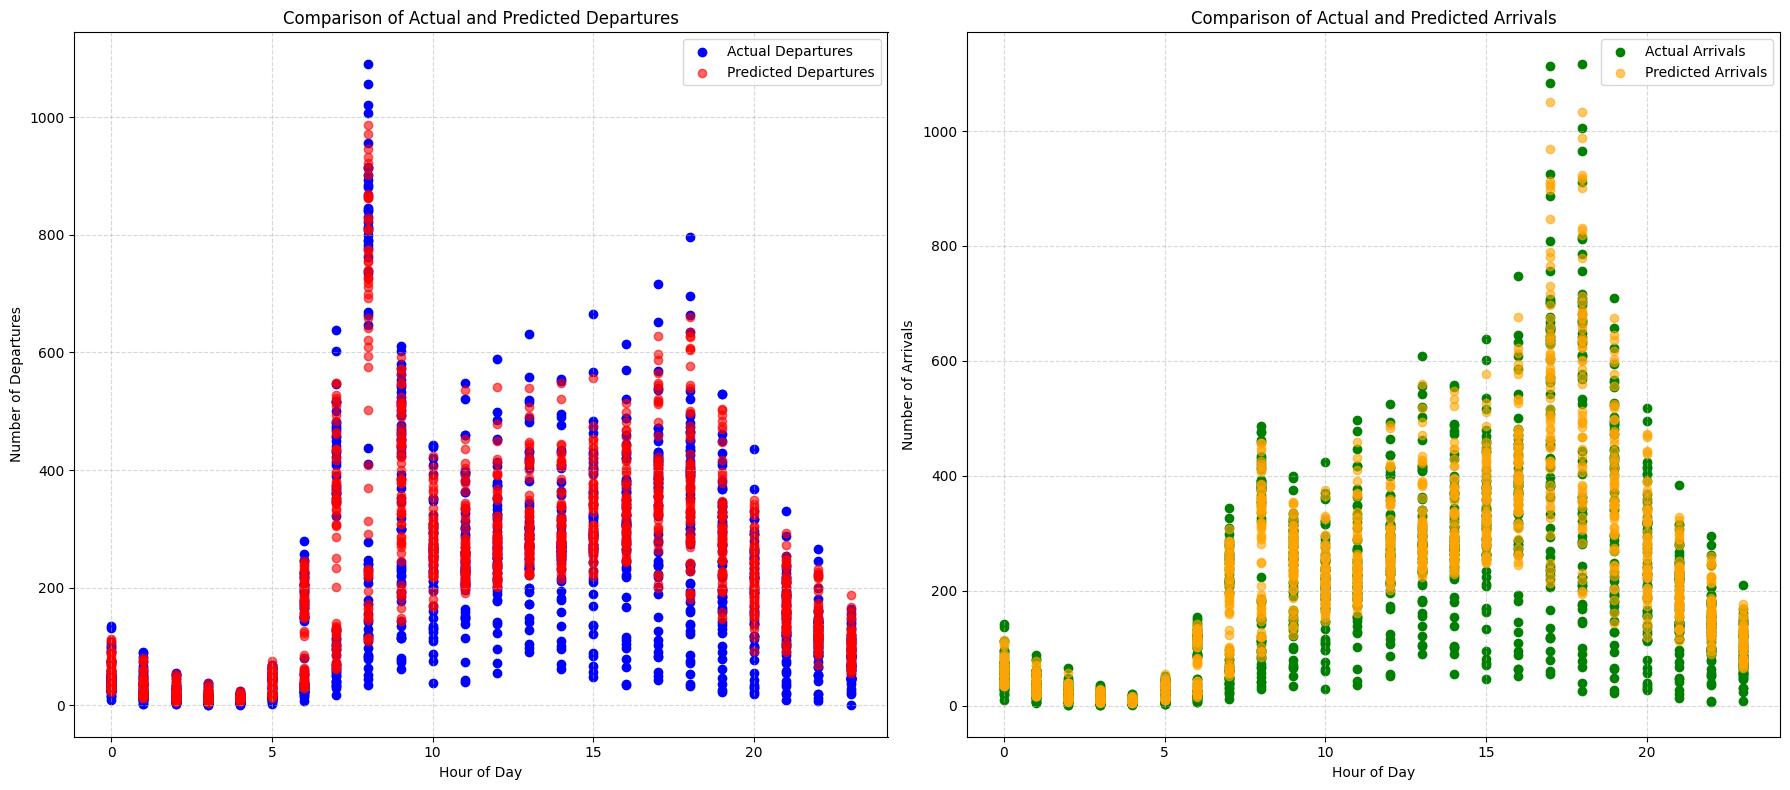

In [59]:
# Plot the actual departures data
plt.subplot(1, 2, 1)  # This creates a 1 row, 2 column grid of plots, and we're addressing the first one
plt.scatter(X_test_departures['hour'], y_test_departures, color='blue', label='Actual Departures')  # Actual data points
plt.scatter(X_test_departures['hour'], y_pred_departures, color='red', label='Predicted Departures', alpha=0.6)  # Predicted data points
plt.title('Comparison of Actual and Predicted Departures')  # Title of the plot
plt.xlabel('Hour of Day')  # Label for the x-axis
plt.ylabel('Number of Departures')  # Label for the y-axis
plt.legend()  # Show the legend
plt.grid(True, linestyle='--', alpha=0.5)

# Plot the actual arrivals data
plt.subplot(1, 2, 2)  # Addressing the second plot in the 1x2 grid
plt.scatter(X_test_arrivals['hour'], y_test_arrivals, color='green', label='Actual Arrivals')  # Actual data points
plt.scatter(X_test_arrivals['hour'], y_pred_arrivals, color='orange', label='Predicted Arrivals', alpha=0.6)  # Predicted data points
plt.title('Comparison of Actual and Predicted Arrivals')  # Title of the plot
plt.xlabel('Hour of Day')  # Label for the x-axis
plt.ylabel('Number of Arrivals')  # Label for the y-axis
plt.legend()  # Show the legend
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

We can therefore predict the next day.

In [60]:
%%html
<a id='calcul3'></a>

## Part 3.3: Calculations applied to bicycles

This section addresses the task of determining the number of bicycles required at each station cluster at the beginning of the day to meet the next day's demand, using the results from a predictive model. The process involves the following key steps:

*    **Data Preprocessing and Spatial Clustering**: The code employs the KMeans algorithm for spatial clustering of bike stations based on their geographical coordinates (latitude and longitude). This clustering is carried out to group stations with similar locations into clusters, enabling the identification of geographically adjacent stations.

*    **Data Transformation**: Trip start and end times are converted into datetime format to extract hourly information. Departures and arrivals of bikes per hour for each cluster are calculated.

*    **Data Merging and Differential Calculation**: The code merges hourly departure and arrival data and computes cumulative differences for each cluster and hour. These differences represent the additional number of bikes required at various times during the day.

*    **Handling Negative Cumulative Differences**: The code ensures that cumulative differences are non-negative, as they reflect the cumulative demand for bikes. Negative values would imply that more bikes were returned than taken out, which doesn't require additional bikes. A "clip" method is used to enforce non-negativity.

*    **Calculating Maximum Bicycle Requirements**: For each cluster, the code determines the maximum number of bicycles needed at any time of the day. This maximum value represents the quantity of bikes to be prepared at the start of each cluster to prevent shortages throughout the following day.

Finally, the code calculates the maximum number of bicycles required for each cluster by taking the largest cumulative difference for each cluster. This figure represents the number of bicycles that need to be ready at the start of each cluster to ensure there is no shortage of bicycles at any point the next day.

In [61]:
# Extract hour information
clustered_data['start_hour'] = clustered_data['starttime'].dt.hour
clustered_data['stop_hour'] = clustered_data['stoptime'].dt.hour

# Calculate the number of departures per hour for each cluster
departures_per_hour = clustered_data.groupby(['Cluster', 'start_hour']).size().reset_index(name='departures')

# Calculate the number of arrivals per hour for each cluster
arrivals_per_hour = clustered_data.groupby(['Cluster', 'stop_hour']).size().reset_index(name='arrivals')

## Data Transformation
# Rename columns for merging
departures_per_hour.rename(columns={'start_hour': 'hour'}, inplace=True)
arrivals_per_hour.rename(columns={'stop_hour': 'hour'}, inplace=True)

In [62]:
## Data Merging and Differential Calculation
# Merge departure and arrival data
hourly_stats = pd.merge(departures_per_hour, arrivals_per_hour, on=['Cluster', 'hour'], how='outer').fillna(0)

# Calculate cumulative differences for each cluster, considering the order of time
hourly_stats.sort_values(by=['Cluster', 'hour'], inplace=True)
hourly_stats['Cumulative_Departures'] = hourly_stats.groupby('Cluster')['departures'].cumsum()
hourly_stats['Cumulative_Arrivals'] = hourly_stats.groupby('Cluster')['arrivals'].cumsum()
hourly_stats['Cumulative_Difference'] = hourly_stats['Cumulative_Departures'] - hourly_stats['Cumulative_Arrivals']

## Handling Negative Cumulative Differences
# Prevent negative cumulative differences
hourly_stats['Cumulative_Difference'] = hourly_stats['Cumulative_Difference'].clip(lower=0)

## Calculating Maximum Bicycle Requirements
# Calculate the maximum number of bikes required for each cluster
max_bikes_required = hourly_stats.groupby('Cluster')['Cumulative_Difference'].max().reset_index(name='Max_Bikes_Required')

# Print the results
print(max_bikes_required)

    Cluster  Max_Bikes_Required
0         0               35066
1         1                   5
2         2                3790
3         3                9769
4         4                5794
5         5               17809
6         6               34314
7         7                6975
8         8                3267
9         9               47009
10       10                7554
11       11                2438
12       12                  16
13       13               46519
14       14               25721
15       15                2881
16       16               46898
17       17                4025
18       18                9127
19       19               12501


In [63]:
%%html
<a id='conclusions'></a>

# Section 4: Conclusions

All in all, after using various data analysis and visualization techniques to gain insights into the Citi Bike dataset, we were able to set up further exploration and predictive analytics.


For the ***exploratory challenge***, we extented the dataset with a dataset containing the exact location of the main attractions in NYC. Then, we were able to highlight the stations that were near those main attractions and understand their popularity. In this part, we focused on the **PCA** for dimensionality reduction.
We highlighted the most performing start and end stations and then explored features contributing to the dataset's variance. In order to understand thoses values, we added weather data from January 2018 and saw that precipitations have indeed an impact on the bike use.

For the ***prediction challenge***, we employed the **KMeans clustering algorithm** for station grouping based on geographical coordinates (latitude and longitude). Indeed, KMeans has some important advantages such as its applicability in unsupervised learning and its simplicity. 20 clusters were created, each representing groups of geographically similar bike start stations. Then, we trained and tested our machine learning model to predict bike-sharing departures and arrivals using Random Forests. We used it due to its strong performance and its ability to prevent overfitting. However, it is very greedy in term of memory, especially with our large dataset. The model's performance was evaluated using metrics such as the **Mean Squared Error and the R-squared** that was greater than 0.6 and therefore met our requirements. Finally, we were able to determine the number of bicycles required at each station cluster at the beginning of the day to meet the next day's demand.

In conclusion, our project provides valuable insights into bike-sharing's users behavior, that could contribute to the **optimization of those services in NYC**. We used both PCA and Clustering (techniques learned in class) in order to enhance our understanding and compare those 2 methods. Looking ahead, a potential future extension could involve predicting the demand for bikes by incorporating weather condition predictions into our analysis. This enhancement could provide a more comprehensive perspective for efficient bike-sharing service management.

In [64]:
import json

with open('Enrico_Clara_Yunxuan.ipynb') as json_file:
    data = json.load(json_file)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print("Word count: ",wordCount)

Word count:  2474
